# Исследование недвижимости Санкт-Петербурга

Входные данные от сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Цель исследования** — установить параметры, определяющие рыночную стоимость объектов недвижимости.

**Ход исследования**

Данные о квартирах получим из файла `real_estate_data.csv`. О качестве данных известно, что, как минимум, имеется множество пропусков, поэтому понадобится обзор данных. 

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Анализ.

##  Обзор данных

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import seaborn as sns # импорт библиотеки seaborn
import numpy as np # импорт библиотеки numpy

In [2]:
df = pd.read_csv('/Users/dianatyubeeva/Desktop/datasets/real_estate_data.csv') # чтение файла с данными и сохранение в df

Выведим на экран первые десять строк таблицы:

In [3]:
display(df.head(10)) # получение первых 10 строк таблицы df

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Видим, что столбцы "склеены", попробуем по-другому распечатать таблицу

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [5]:
display(df.head(10)) # получение первых 10 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Одной командой получим общую информацию о данных таблицы:

In [6]:
df.info()# получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца. Тип данных в столбцах — `object`, `int64`, `float64`, `bool`.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м);
* `balcony` — число балконов;  
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);  
* `kitchen_area` — площадь кухни в квадратных метрах (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь в квадратных метрах (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);  
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — квартира-студия (булев тип);  
* `total_area` — площадь квартиры в квадратных метрах (м²);
* `total_images` — число фотографий квартиры в объявлении;

Количество значений в столбцах отличаются от общего размера таблицы. Значит, в данных есть пропущенные значения, причину которых нужно выяснить.

**Выводы**

Данные представляют собой полный набор критериев, предъявляемый для выбора того или иного жилья: вплоть от числа комнат до расстояния до аэропорта.

Предварительно можно утверждать, что данных достаточно для исследования, но встречаются пропуски.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

##  Предобработка данных

###  Определение пропусков

Проверим дествительно ли есть пропуски и в каких столбцах конкретно:

In [7]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Почти во всех столбцах есть пропуски! 

Оценим долю пропущенных значений в каждом столбце с пропусками:

In [8]:
df.isnull().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

В столбце `is_apartment` целых 88% пропущенных значений. Рассмотрим ближе каждый из столбцов и попытаемся заполнить пропуски.

###  Категоризация данных 

Перед заполнением пропусков, упростим себе работу, сделав категоризация данных по разным параметрам.

####  Категоризация по площади квартир

Предварительно изучим сам столбец на аномалии и пропуски, при их отсутствии прокатегоризируем данные. 

In [9]:
df['total_area'].isnull().sum()

0

In [10]:
display(df.sort_values(by = 'total_area',ascending=False).head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.9,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.5,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

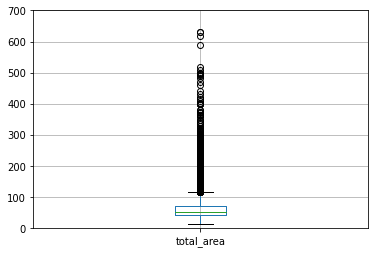

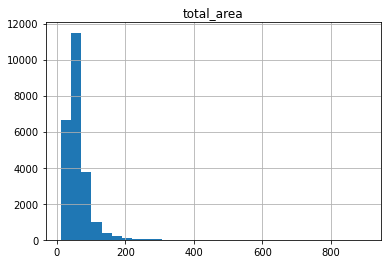

In [11]:
df.boxplot('total_area')
plt.ylim(0, 700)
df.hist('total_area', bins=30)

<div class="alert alert-warning">
    <h2> Комментарий ревьюера VERS#2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Подгрузку всех библиотек проекта лучше осуществлять на первом этапе. То есть import matplotlib.pyplot as plt необходимо разместить в одной ячейке с кодом по импорту pandas.

In [12]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Несмотря на то, что квартилем второго порядка считается величина 52 кв. м, в реальной жизни встречаются значения порядком выше. Если площадь очень большая и ее величина вызывает сомнение, стоит обратить внимание на цену. Поближе рассмотрим строчку, где лежит максимум:

In [13]:
df[df['total_area'] == 900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [14]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Учитвая показатели, 420 млн в целом можно соотнести с 900 кв. м, поэтому не будем ограничивать выборку по этому столбцу. 

In [15]:
#создадим функцию, которая принимает в качестве аргумента значения колонки total_area
def total_area_category(row):
    area_category = row['total_area']
    #через условные операторы разобьем на категории
    if area_category <= 50:
        return 'F'
    elif area_category >= 51 and area_category <= 150:
        return 'E'
    elif area_category >= 151 and area_category <= 250:
        return 'D'
    elif area_category <= 350 and area_category >= 251:
        return 'C'
    elif area_category <= 450 and area_category >= 351:
        return 'B'
    else:
        return 'A'
df['total_area_category'] = df.apply(total_area_category, axis=1)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,E
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,F
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,E
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,D
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,E


####  Категоризация по доходу

Предварительно изучим сам столбец на аномалии и пропуски, при их отсутствии прокатегоризируем данные. 

In [16]:
df['last_price'].isnull().sum()

0

In [17]:
display(df.sort_values(by = 'last_price',ascending=False).head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,B
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,A
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,B
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.5,7.0,95.0,5,NaN,...,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,D
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.4,7.0,258.0,5,NaN,...,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0,A


array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

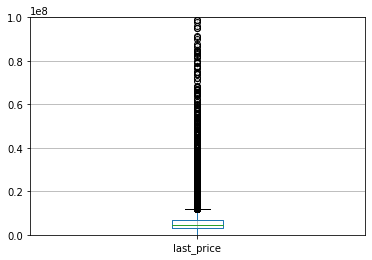

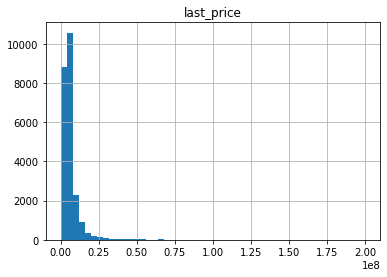

In [18]:
df.boxplot('last_price')
plt.ylim(0, 100000000)
df.hist('last_price', bins=50, range = (0, 200000000))

Статистические показатели выборки по столбцу `last_price` мы уже рассматривали и их нормальность также соотносится с выборкой по предыдущему столбцу. Соотвественно, ограничивать эту колонку также не будем. 

In [19]:
df['last_price'] = df['last_price'].astype(int) #поменяем тип столбца, чтобы облегчить работу с таблицей


In [20]:
#создадим функцию, которая принимает в качестве аргумента значения колонки last_price
def total_price_category(row):
    price_category = row['last_price']
    #через условные операторы разобьем на категории
    if price_category in range(2000001):
        return 'F'
    elif price_category in range(2000001, 5000001):
        return 'E'
    elif price_category in range(5000001, 7000001):
        return 'D'
    elif price_category in range(7000001, 10000001):
        return 'C'
    elif price_category in range(10000001, 15000001):
        return 'C+'
    elif price_category in range(15000001, 20000001):
        return 'B'
    elif price_category in range(20000001, 30000001):
        return 'B+'
    else:
        return 'A'
df['total_price_category'] = df.apply(total_price_category, axis=1)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,total_price_category
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,E,C+
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,F,E
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,E,D
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,D,A
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,E,C


####  Категоризация по количеству комнат

Предварительно изучим сам столбец на аномалии и пропуски, при их отсутствии прокатегоризируем данные. 

In [21]:
df['rooms'].isna().sum()

0

In [22]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [23]:
len(df[df['rooms'] == 0]) / df.shape[0] * 100

0.8312587028988565

Аномальное значение составляет долю меньше 1% относительно всего датафрейма, целесообразней удалить такие строки и сделать категоризацию, используя остальные величины. 

In [24]:
df = df[df['rooms'] != 0]

In [25]:
#создадим функцию, которая принимает в качестве аргумента значения колонки rooms
def total_room_category(row):
    room_category = row['rooms']
    #через условные операторы разобьем на категории
    if room_category == 1:
        return 'однокомнатная квартира'
    elif room_category == 2:
        return 'двухкомнатная квартира'
    elif room_category == 3:
        return 'трехкомнатная квартира'
    elif room_category == 4:
        return 'четырехкомнатная квартира'
    else:
        return 'многокомнатная квартира'
df['total_room_category'] = df.apply(total_room_category, axis=1)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,total_price_category,total_room_category
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,E,C+,трехкомнатная квартира
1,7,3350000,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,F,E,однокомнатная квартира
2,10,5196000,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,E,D,двухкомнатная квартира
3,0,64900000,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,D,A,трехкомнатная квартира
4,2,10000000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,E,C,двухкомнатная квартира


####  Категоризация по населенному пункту

Предварительно изучим сам столбец на аномалии и пропуски, при их отсутствии прокатегоризируем данные. 

In [26]:
df['locality_name'].isna().sum()

49

Значения данной колонки относятся к качественным данным. Логично полагать, что пропуски такой метрики не восстановить через количественные методы, целесообразней будет удалить такие строки. 

In [27]:
df = df.dropna(subset = ['locality_name'], axis = 0)
df['locality_name'].isna().sum()

0

In [28]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [29]:
df['locality_category'] = df['locality_name']
def locality_cat(long_loc, short_loc):
    for locality_category in long_loc:
        df['locality_category'] = df['locality_category'].replace(long_loc, short_loc)

In [30]:
#создаем словарь с генераторами словарей
locality_category = {
    'поселок': [x for x in df['locality_name'].unique() if (('поселок' in x) or ('посёлок' in x)) and (('город' not in x) and ('кот' not in x))],
    'городской поселок': [x for x in df['locality_name'].unique() if ('город' in x) and ('пос' in x)],
    'коттеджный поселок': [x for x in df['locality_name'].unique() if ('кот' in x) and ('пос' in x)],
    'садовое товарищество': [x for x in df['locality_name'].unique() if 'товар' in x],
    'село': [x for x in df['locality_name'].unique() if 'село' in x],
    'деревня' : [x for x in df['locality_name'].unique() if 'деревня' in x],
    'город' : [x for x in df['locality_name'].unique() if ('пос' not in x) and ('деревня'not in x) and ('село'not in x) and ('товар'not in x)],                                            
}
#используем функцию и меняем дубликаты на словосочетания 
locality_cat(locality_category['поселок'], 'поселок')
locality_cat(locality_category['городской поселок'], 'городской поселок')
locality_cat(locality_category['коттеджный поселок'], 'коттеджный поселок')
locality_cat(locality_category['садовое товарищество'], 'садовое товарищество')
locality_cat(locality_category['село'], 'село')
locality_cat(locality_category['деревня'], 'деревня')
locality_cat(locality_category['город'], 'город')

In [31]:
df['locality_category'].unique()

array(['город', 'поселок', 'городской поселок', 'деревня',
       'садовое товарищество', 'село', 'коттеджный поселок'], dtype=object)

###  Заполнение пропусков, проверка данных на аномалии, изучение параметров

####  Колонка `ceiling_height`

Значения данной метрики относятся к количественным данным, соотвественно, для заполнения пропусков будем использовать характерные значения (либо медиану, либо среднее арифметическое). 

Чтобы точно определиться с статистическим инструментом, изучим выборку значений следующим образом:

In [32]:
display(df.sort_values(by = 'ceiling_height',ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,total_price_category,total_room_category,locality_category
22869,0,15000000,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,8283.0,1.0,223.0,3.0,30.0,19.0,F,C+,однокомнатная квартира,город
22336,19,9999000,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,3506.0,0.0,NaN,3.0,511.0,NaN,E,C,двухкомнатная квартира,город
3148,14,2900000,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,E,E,трехкомнатная квартира,город
21377,19,4900000,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,9760.0,0.0,NaN,0.0,NaN,61.0,F,E,однокомнатная квартира,город
22938,14,4000000,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,NaN,NaN,NaN,NaN,NaN,27.0,E,E,четырехкомнатная квартира,деревня
5807,17,8150000,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,20444.0,0.0,NaN,3.0,80.0,38.0,E,C,двухкомнатная квартира,город
5246,0,2500000,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,540.0,E,E,двухкомнатная квартира,деревня
17857,1,3900000,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,15543.0,0.0,NaN,0.0,NaN,73.0,E,E,трехкомнатная квартира,город
20478,11,8000000,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,3246.0,0.0,NaN,3.0,449.0,429.0,F,C,однокомнатная квартира,город
10773,8,3800000,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,NaN,NaN,NaN,NaN,NaN,71.0,E,E,двухкомнатная квартира,поселок


Оценим распредление высоты потолков всех квартир и выведим долю аномальных значений:

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

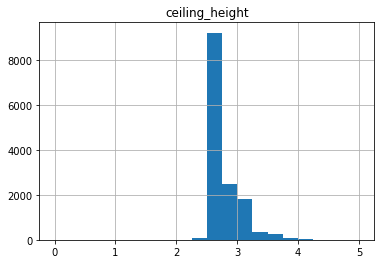

In [33]:
df.hist('ceiling_height', bins=20, range = (0, 5))

In [34]:
len(df.query('ceiling_height > 3.5'))/ df.shape[0] * 100

1.2748902059438025

По сути большая часть данных этой колонки находится в пределах (2.5 , 3). Однако, встречаются и значения близкие к 5. Значений превышающих число 3.5 всего 1,5% внутри столбца, но все они аномальные. Лучше рассмотреть эти значений можно в следующем графике:

(0.0, 4.0)

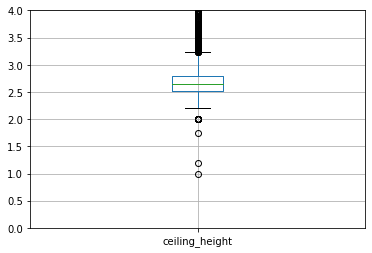

In [35]:
df.boxplot('ceiling_height')
plt.ylim(0, 4)

Предварительно в total_area нет пропусков, поэтому используем его значения для категоризации данных, чтобы упростить работу с таблицей. Далее, продолжим работу с аномальными значениями. 

In [36]:
df_addit = df.pivot_table(index='total_area_category', values = 'ceiling_height', aggfunc = ['median'])
df_addit.columns = ['ceiling_height']
display(df_addit)

,ceiling_height
total_area_category,
A,2.600
B,3.320
C,3.325
D,3.170
E,2.700
F,2.600


Так как `ceiling_height` наполнен количествеными данными с выдающимися значениями, то лучше использовать медиану для заполнения пропусков. С этой целью и была сделана сводная таблице выше, используем ее и избавимся от пропущенных значений.

In [37]:
#создадим функцию, которая заполняет пропуски соответсующими значениями в зависимости от категории
def func_1(row):
    if pd.isna(row['ceiling_height']):
        return df_addit.loc[row['total_area_category']]
    return row['ceiling_height']

df['ceiling_height'] = df.apply(func_1, axis=1)
df['ceiling_height'] = df['ceiling_height'].astype(float)

In [38]:
df['ceiling_height'].isna().sum()

0

(0.0, 4.0)

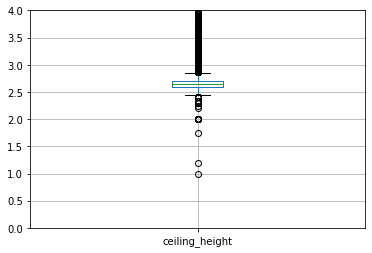

In [39]:
df.boxplot('ceiling_height')
plt.ylim(0, 4)

Судя по "ящику с усами", выбросами считаются все значения выше 3.5. На практике еще могут встречаться квартиры с потолком около 5м, но никак не 100м. Сделаем срез, который ограничивает выборку числом 5, а аномальные удалим из таблицы. 

In [40]:
df = df.query('ceiling_height <= 5')

####  Колонка `floors_total`

Значения данной метрики относятся к количественным данным, соотвественно, для заполнения пропусков будем использовать характерные значения (либо медиану, либо среднее арифметическое). 

Чтобы точно определиться с статистическим инструментом, изучим выборку значений следующим образом:

In [41]:
display(df.sort_values(by = 'floors_total',ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,total_price_category,total_room_category,locality_category
2253,12,3800000,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,49488.0,2.0,342.0,3.0,614.0,166.0,F,E,двухкомнатная квартира,город
16731,9,3978000,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,12978.0,1.0,793.0,0.0,NaN,45.0,F,E,однокомнатная квартира,город
16934,5,4100000,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,20444.0,0.0,NaN,3.0,80.0,71.0,F,E,однокомнатная квартира,город
11079,16,9200000,75.0,2019-02-22T00:00:00,2,2.70,36.0,40.0,29,NaN,...,20444.0,0.0,NaN,3.0,80.0,NaN,E,C,двухкомнатная квартира,город
397,15,5990000,54.0,2018-03-22T00:00:00,2,2.70,36.0,21.4,28,NaN,...,20444.0,0.0,NaN,3.0,80.0,11.0,E,D,двухкомнатная квартира,город
7236,10,4599000,42.0,2019-01-10T00:00:00,1,2.60,35.0,15.0,12,NaN,...,20444.0,0.0,NaN,3.0,80.0,72.0,F,E,однокомнатная квартира,город
5808,12,4590000,43.0,2018-10-19T00:00:00,1,2.60,35.0,14.0,11,NaN,...,20444.0,0.0,NaN,3.0,80.0,82.0,F,E,однокомнатная квартира,город
13975,19,6990000,65.0,2018-10-06T00:00:00,2,2.70,35.0,32.1,23,NaN,...,20444.0,0.0,NaN,3.0,80.0,89.0,E,D,двухкомнатная квартира,город
1917,13,10150000,74.0,2017-11-17T00:00:00,2,2.80,35.0,34.4,30,NaN,...,20444.0,0.0,NaN,3.0,80.0,NaN,E,C+,двухкомнатная квартира,город
4855,12,5500000,50.0,2017-06-22T00:00:00,1,2.80,35.0,22.0,4,NaN,...,20339.0,1.0,609.0,3.0,145.0,537.0,F,D,однокомнатная квартира,город


Из-за выдающихся значений целесообразнее использовать медиану.

Создадим сводную таблицу:

In [42]:
df_money = df.pivot_table(index='total_price_category', values = 'floors_total', aggfunc = ['median'])
df_money.columns = ['floors_total']
display(df_money)

,floors_total
total_price_category,
A,7.0
B,7.0
B+,7.0
C,10.0
C+,9.0
D,10.0
E,9.0
F,5.0


In [43]:
#создадим функцию, которая заполняет пропуски соответсующими значениями в зависимости от категории
def func_2(row):
    if pd.isna(row['floors_total']):
        return df_money.loc[row['total_price_category']]
    return row['floors_total']

df['floors_total'] = df.apply(func_2, axis=1)

In [44]:
df['floors_total'].isna().sum()

0

####  Колонка `living_area`

Значения данной метрики относятся к количественным данным, соотвественно, для заполнения пропусков будем использовать характерные значения (либо медиану, либо среднее арифметическое). 

Чтобы точно определиться с статистическим инструментом, изучим выборку значений следующим образом:

In [45]:
display(df.sort_values(by = 'living_area', ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,total_price_category,total_room_category,locality_category
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,7877.0,0.0,NaN,2.0,318.0,106.0,A,A,многокомнатная квартира,город
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,4666.0,1.0,767.0,0.0,NaN,14.0,A,A,многокомнатная квартира,город
12401,20,91500000,495.0,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,NaN,...,5735.0,2.0,110.0,0.0,NaN,14.0,A,A,многокомнатная квартира,город
4237,1,50000000,517.0,2017-10-14T00:00:00,7,2.60,4.0,332.0,3,NaN,...,1847.0,2.0,477.0,2.0,540.0,NaN,A,A,многокомнатная квартира,город
12859,20,140000000,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,4972.0,0.0,NaN,2.0,210.0,NaN,A,A,многокомнатная квартира,город
660,3,49950000,483.9,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,...,945.0,3.0,461.0,3.0,22.0,391.0,A,A,многокомнатная квартира,город
8018,20,84000000,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,5735.0,2.0,110.0,0.0,NaN,1078.0,A,A,многокомнатная квартира,город
14088,8,51000000,402.0,2017-02-07T00:00:00,6,3.15,8.0,300.0,6,NaN,...,5052.0,1.0,253.0,0.0,NaN,32.0,B,A,многокомнатная квартира,город
20273,12,20000000,460.8,2019-03-20T00:00:00,6,3.10,3.0,279.6,1,NaN,...,15459.0,1.0,852.0,3.0,122.0,21.0,A,B,многокомнатная квартира,город
22494,7,91075000,491.0,2017-05-27T00:00:00,5,4.20,9.0,274.0,9,NaN,...,5845.0,2.0,116.0,0.0,NaN,115.0,A,A,многокомнатная квартира,город


In [46]:
df['living_area'].describe()

count    21537.000000
mean        34.563342
std         22.028913
min          2.000000
25%         18.700000
50%         30.000000
75%         42.430000
max        409.700000
Name: living_area, dtype: float64

Минимум выборки, который равен 2, выглядит очень подозрительно. Поближе рассмотрим следующий график и решим какой делать срез из-за аномальных значений:

(0.0, 300.0)

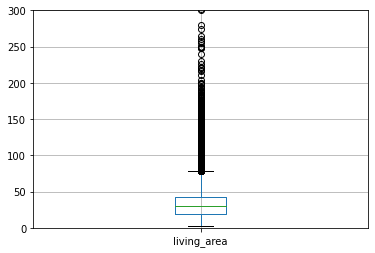

In [47]:
df.boxplot('living_area')
plt.ylim(0,300)

Можно заметить очень много выбросов, однако, перед финальным срезом стоит заполнить пропуски и снова взглянуть на график.


Из-за выдающихся значений целесообразнее использовать медиану, создадим сводную таблицу и заполним пропуски:

In [48]:
df_live = df.pivot_table(index='total_price_category', values = 'living_area', aggfunc = ['median'])
df_live.columns = ['living_area']
display(df_live)

,living_area
total_price_category,
A,97.00
B,65.90
B+,75.00
C,43.00
C+,53.35
D,34.20
E,21.00
F,25.00


In [49]:
#создадим функцию, которая заполняет пропуски соответсующими значениями в зависимости от категории
def func_3(row):
    if pd.isna(row['living_area']):
        return df_live.loc[row['total_price_category']]
    return row['living_area']


df['living_area'] = df.apply(func_3, axis=1)
df['living_area'] = df['living_area'].astype(float)

In [50]:
df['living_area'].isna().sum()

0

(0.0, 300.0)

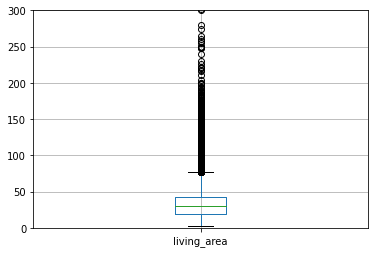

In [51]:
df.boxplot('living_area')
plt.ylim(0,300)

In [52]:
len(df.query('living_area < 10.0'))/ df.shape[0] * 100

0.09821085443443359

In [53]:
len(df.query('(living_area >= 10.0) & (living_area < 409.7)'))/ df.shape[0] * 100

99.89751910841625

По сути большая часть данных этой колонки находится в пределах (19 , 43). Однако, встречаются и значения близкие к 2, но нижним пределом лучше взять число более близкое к реальности, например - 10. Значений не превышающих число 10 всего 0,11% внутри столбца, но все они аномальные. 

Решено. Сделаем следующий срез, который лишит нас всего около 6% данных:

In [54]:
df = df.query('(living_area >= 10.0) & (living_area < 409.7)')

####  Колонка `is_apartment`

Значения данной колонки относятся к качественным данным, точнее, к булевым переменным. Логично полагать, что пропуски такой метрики означают отсутствие аппартаментов вовсе.

In [55]:
df['is_apartment'] = df['is_apartment'].fillna(0)

In [56]:
df['is_apartment'].isna().sum()

0

####  Колонка `kitchen_area`

Значения данной метрики относятся к количественным данным, соотвественно, для заполнения пропусков будем использовать характерные значения (либо медиану, либо среднее арифметическое). 

Чтобы точно определиться с статистическим инструментом, изучим выборку значений следующим образом:

In [57]:
display(df.sort_values(by = 'kitchen_area',ascending=False).head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,total_price_category,total_room_category,locality_category
20215,2,85000000,249.7,2018-02-01T00:00:00,3,3.170,10.0,72.0,9,0,...,4624.0,1.0,2218.0,2.0,99.0,26.0,D,A,трехкомнатная квартира,город
2489,9,12500000,255.0,2017-04-21T00:00:00,3,3.325,2.0,153.9,2,0,...,6916.0,0.0,NaN,3.0,198.0,102.0,C,C+,трехкомнатная квартира,город
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.500,6.0,409.0,3,0,...,4666.0,1.0,767.0,0.0,NaN,14.0,A,A,многокомнатная квартира,город
16239,5,82400000,181.1,2017-05-24T00:00:00,3,3.900,9.0,58.2,4,False,...,5845.0,2.0,116.0,0.0,NaN,501.0,D,A,трехкомнатная квартира,город
16797,9,65850000,146.0,2017-07-14T00:00:00,2,2.700,9.0,40.0,3,0,...,5845.0,2.0,116.0,0.0,NaN,77.0,E,A,двухкомнатная квартира,город
10867,1,56844500,177.9,2015-01-15T00:00:00,3,3.170,6.0,87.2,5,True,...,318.0,2.0,160.0,3.0,569.0,NaN,D,A,трехкомнатная квартира,город
4394,20,57000000,174.0,2015-11-09T00:00:00,3,3.200,10.0,95.0,6,0,...,4166.0,1.0,193.0,3.0,199.0,1039.0,D,A,трехкомнатная квартира,город
492,18,95000000,216.0,2017-12-05T00:00:00,4,3.000,5.0,86.0,4,0,...,436.0,2.0,138.0,3.0,620.0,14.0,D,A,четырехкомнатная квартира,город
14644,17,47000000,150.0,2017-02-28T00:00:00,4,3.700,6.0,58.0,5,0,...,7616.0,0.0,NaN,0.0,NaN,507.0,E,A,четырехкомнатная квартира,город
16647,15,122000000,145.0,2017-04-25T00:00:00,3,3.300,6.0,36.0,2,0,...,7023.0,2.0,478.0,3.0,250.0,335.0,E,A,трехкомнатная квартира,город


In [58]:
df['kitchen_area'].describe()

count    21331.000000
mean        10.551365
std          5.842789
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Минимум выборки, который равен 1, выглядит очень подозрительно. Поближе рассмотрим следующий график и решим какой делать срез из-за аномальных значений:

(0.0, 100.0)

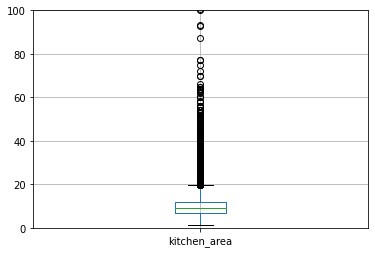

In [59]:
df.boxplot('kitchen_area')
plt.ylim(0, 100)

Прежде чем продолжить работу с аномалиями, заполним пропуски. 

Из-за выдающихся значений целесообразнее использовать медиану, создадим сводную таблицу и заполним пропуски:

In [60]:
df_kitch = df.pivot_table(index='total_price_category', values = 'kitchen_area', aggfunc = ['median'])
df_kitch.columns = ['kitchen_area']
display(df_kitch)

,kitchen_area
total_price_category,
A,22.00
B,17.00
B+,20.00
C,11.78
C+,14.40
D,10.00
E,8.20
F,6.50


In [61]:
#создадим функцию, которая заполняет пропуски соответсующими значениями в зависимости от категории
def func_4(row):
    if pd.isna(row['kitchen_area']):
        return df_kitch.loc[row['total_price_category']]
    return row['kitchen_area']

df['kitchen_area'] = df.apply(func_4, axis=1)
df['kitchen_area'] = df['kitchen_area'].astype(float)

In [62]:
df['kitchen_area'].isna().sum()

0

Взглянем еще раз на "ящик с усами":

(0.0, 100.0)

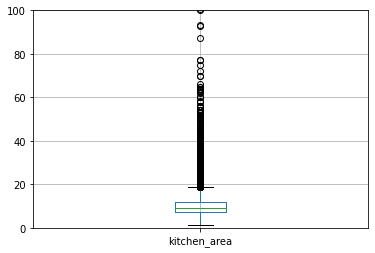

In [63]:
df.boxplot('kitchen_area')
plt.ylim(0, 100)

In [64]:
df['kitchen_area'].describe()

count    23395.000000
mean        10.477795
std          5.662416
min          1.300000
25%          7.100000
50%          9.000000
75%         11.780000
max        107.000000
Name: kitchen_area, dtype: float64

In [65]:
len(df.query('kitchen_area < 6.0'))/ df.shape[0] * 100

7.257961102799744

In [66]:
len(df.query('(kitchen_area >= 6.0) & (kitchen_area < 100.0)'))/ df.shape[0] * 100

92.72921564436845

По сути большая часть данных этой колонки находится в пределах (7 , 12). Однако, встречаются и значения близкие к 1, но нижним пределом лучше взять число более близкое к реальности, например - 6. Значений не превышающих число 6 всего 8% внутри столбца, но все они аномальные. 

Решено. Сделаем следующий срез, который лишит нас всего около 10% данных:

In [67]:
df = df.query('(kitchen_area >= 6.0) & (kitchen_area < 100.0)')

Проверив столбцы `kitchen_area` и  `living_area` на аномальность, сделаем доп. фильтрацию, которая подтвердит объективность данных:

In [68]:
#фильтр, который выдает строки, в которых сумма площадей жилых комнат не превышает общую
df = df[(df['kitchen_area'] + df['living_area']) < df['total_area']] 

####  Колонка `balcony`

Значения данной метрики относятся к количественным данным, соотвественно, для заполнения пропусков будем использовать характерные значения (либо медиану, либо среднее арифметическое). 

Чтобы точно определиться с статистическим инструментом, изучим выборку значений следующим образом:

In [69]:
df['balcony'].describe()

count    10971.000000
mean         1.174460
std          1.091113
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

(0.0, 6.0)

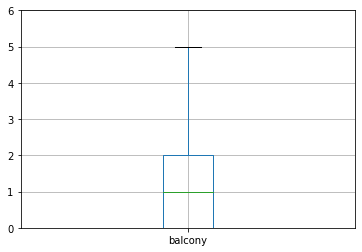

In [70]:
df.boxplot('balcony')
plt.ylim(0, 6)

Аномальных значений не было обнаружено, переходим к заполнению пропусков:

Логично полагать, что пропуски в данном столбце означают отсутствие балконов вовсе. 

In [71]:
df['balcony'] = df['balcony'].fillna(0)

In [72]:
df['balcony'].isna().sum()

0

####  Колонки `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`

Изучим эти колонки через диаграммы распределения:

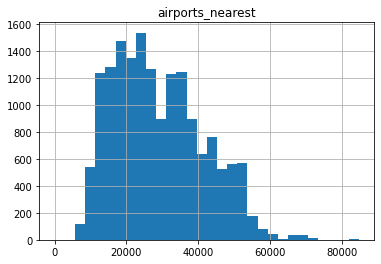

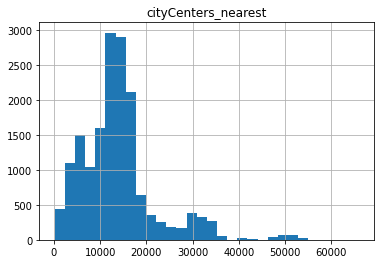

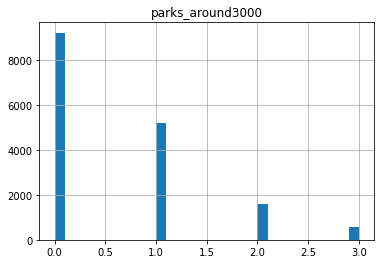

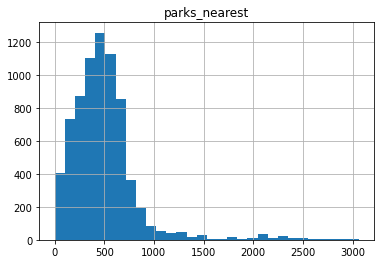

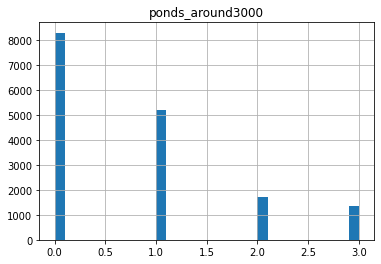

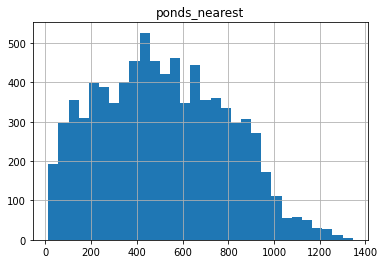

In [73]:
for columnss in ['airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest']:
    df.hist(columnss, bins=30)
    plt.show()

В каждом стоблце присутствуют аномальные значения, но с точки зрения реальной жизни такие величины возможны. Для пропусков будем использовать медиану. Осталось определиться с катеоризацией, которую будем использовать. 

Для них всех целесообразней использовать одну категоризацию, посмотрим как одна из этих колонок соотносится с `locality_category`:

In [74]:
df_local = df.pivot_table(index='locality_category', values = 'airports_nearest', aggfunc = ['median'])
df_local.columns = ['airports_nearest']
display(df_local)

,airports_nearest
locality_category,
город,27102.0
поселок,25268.0


Учитывая особенности такой категоризации, нельзя ни задаться вопросом об подкатегории `деревня`. Почему она отсутствует? Как это связано с другими столбцами? Давайте, найдем долю пропусков по этой подкатегории относительно колонок:

In [75]:
df[df['locality_category'] == 'деревня'].isna().mean()*100

total_images              0.000000
last_price                0.000000
total_area                0.000000
first_day_exposition      0.000000
rooms                     0.000000
ceiling_height            0.000000
floors_total              0.000000
living_area               0.000000
floor                     0.000000
is_apartment              0.000000
studio                    0.000000
open_plan                 0.000000
kitchen_area              0.000000
balcony                   0.000000
locality_name             0.000000
airports_nearest        100.000000
cityCenters_nearest     100.000000
parks_around3000        100.000000
parks_nearest           100.000000
ponds_around3000        100.000000
ponds_nearest           100.000000
days_exposition          11.300122
total_area_category       0.000000
total_price_category      0.000000
total_room_category       0.000000
locality_category         0.000000
dtype: float64

Подобная информация говорит нам о том, что подкатегория `деревня` отсутствует абсолютно внутри каждой из колонок, кроме `days_exposition`. Придется использовать другую категоризация для заполнения пропусков. Целесообразней в этом случае использовать `total_price_category`. 

In [76]:
for column in ['airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest']:
    
    df_pivot = df.pivot_table(index = 'total_price_category', values = column, aggfunc = ['median'])
    def func_6(row):
        if pd.isna(row[column]):
            return df_pivot.loc[row['total_price_category']]
        return row[column]
    df[column] = df.apply(func_6, axis=1)

In [77]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2852
total_area_category        0
total_price_category       0
total_room_category        0
locality_category          0
dtype: int64

###  Изменение типов данных

Посмотрим как изменились данные после заполнения пропусков:

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21268 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21268 non-null  int64  
 1   last_price            21268 non-null  int64  
 2   total_area            21268 non-null  float64
 3   first_day_exposition  21268 non-null  object 
 4   rooms                 21268 non-null  int64  
 5   ceiling_height        21268 non-null  float64
 6   floors_total          21268 non-null  object 
 7   living_area           21268 non-null  float64
 8   floor                 21268 non-null  int64  
 9   is_apartment          21268 non-null  object 
 10  studio                21268 non-null  bool   
 11  open_plan             21268 non-null  bool   
 12  kitchen_area          21268 non-null  float64
 13  balcony               21268 non-null  float64
 14  locality_name         21268 non-null  object 
 15  airports_nearest   

Многие из столбцов поменяли тип в ходе заполнения: с `int`или `float` к `object`. Исправим это и вернем данные к их "нормальному" типу. 

In [79]:
for info in df.columns:
    if info in ['airports_nearest', 'cityCenters_nearest', 'parks_around3000',
               'parks_nearest', 'ponds_around3000', 'ponds_nearest','living_area', 'kitchen_area']:
        df[info] = df[info].astype(float)
    elif info in ['floors_total','balcony']:
        df[info] = df[info].astype(int)

Нельзя забывать и о столбце, где указан формат `object` вместо `datetime`. Нужно это исправить:

In [80]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [81]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,total_price_category,total_room_category,locality_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,16028.0,1.0,482.0,2.0,755.0,NaN,E,C+,трехкомнатная квартира,город
1,7,3350000,40.4,2018-12-04,1,2.60,11,18.6,1,0,...,18603.0,0.0,460.0,0.0,546.0,81.0,F,E,однокомнатная квартира,поселок
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,0,...,13933.0,1.0,90.0,2.0,574.0,558.0,E,D,двухкомнатная квартира,город
3,0,64900000,159.0,2015-07-24,3,3.17,14,97.0,9,0,...,6800.0,2.0,84.0,3.0,234.0,424.0,D,A,трехкомнатная квартира,город
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,8098.0,2.0,112.0,1.0,48.0,121.0,E,C,двухкомнатная квартира,город


Проверим изменились ли данные:

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21268 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21268 non-null  int64         
 1   last_price            21268 non-null  int64         
 2   total_area            21268 non-null  float64       
 3   first_day_exposition  21268 non-null  datetime64[ns]
 4   rooms                 21268 non-null  int64         
 5   ceiling_height        21268 non-null  float64       
 6   floors_total          21268 non-null  int64         
 7   living_area           21268 non-null  float64       
 8   floor                 21268 non-null  int64         
 9   is_apartment          21268 non-null  object        
 10  studio                21268 non-null  bool          
 11  open_plan             21268 non-null  bool          
 12  kitchen_area          21268 non-null  float64       
 13  balcony         

###  Исследование пропусков во времени продажи квартир 

Лучше изучим время продажи квартир через сортировку и графики:

In [83]:
df.sort_values('days_exposition').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,total_price_category,total_room_category,locality_category
1632,19,4000000,49.90,2019-05-01,2,2.5,9,25.00,1,0,...,14384.0,1.0,20.0,1.0,681.0,1.0,F,E,двухкомнатная квартира,город
13061,20,6100000,51.40,2019-04-29,2,3.0,5,31.70,4,0,...,9389.0,0.0,451.0,0.0,512.0,2.0,E,D,двухкомнатная квартира,город
16053,4,4070000,45.10,2019-04-30,2,2.6,5,22.70,3,0,...,11668.0,2.0,485.0,0.0,546.0,2.0,F,E,двухкомнатная квартира,город
17413,3,2950000,35.00,2017-11-10,1,2.6,12,18.00,11,0,...,16550.0,0.0,460.0,0.0,546.0,3.0,F,E,однокомнатная квартира,город
11070,2,3134850,33.31,2019-04-22,1,2.6,12,15.11,12,0,...,14879.0,0.0,460.0,0.0,546.0,3.0,F,E,однокомнатная квартира,поселок


Чтобы определить "слишком долгую продажу" и "очень быструю продажу" обратимся к следующим графикам:

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

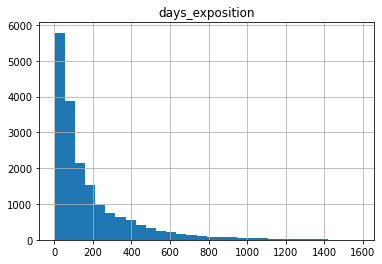

In [84]:
df.hist('days_exposition', bins=30)

In [85]:
df['days_exposition'].describe()

count    18416.000000
mean       183.133417
std        221.344155
min          1.000000
25%         45.000000
50%         98.000000
75%        235.000000
max       1580.000000
Name: days_exposition, dtype: float64

Продажа продолжительностью 1000 дней — уже редки. Дольше 1400 дней почти не продаются квартиры. А на участке более 1600 дней гистограмма сливается с нулём.

Примем верхнюю границу в 1400 дней. Это число кажется разумным: дольше продаются редко. Если отбросить значения больше 1400, много данных не потеряется. Да и вряд ли на продажу тратят больше 1400 дней (3 года).

В качестве нижней границе возьмем значение 10.

Решено. Продолжаем работать с наблюдениями, удовлетворяющими условию: `df.query('(days_exposition < 1400) & (days_exposition > 7)')`

Прежде чем делать срез, попробуем обработать пропуски.

Чтобы определить причину пропусков сделаем замену-заглушку (-4) и посмотрим, в какой год было сделано максимальное количество пропусков:

In [86]:
df2 = df.copy(deep=True)
df2['days_exposition'] = df2['days_exposition'].fillna(-4)

In [87]:
gaps_exposition = df2[df2['days_exposition'] == -4]

<AxesSubplot:xlabel='first_day_exposition'>

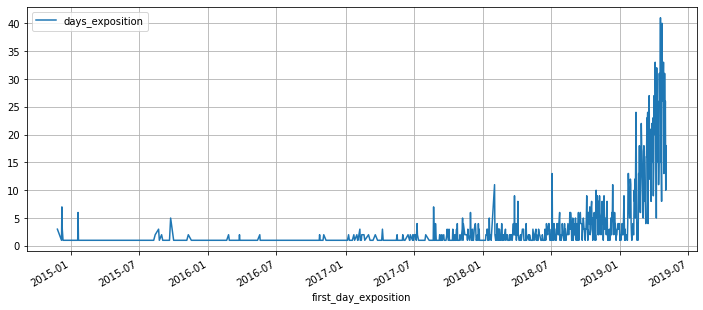

In [88]:
(
    gaps_exposition.pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='count')
    .plot(grid=True, figsize=(12,5))
)

Большая часть пропусков была сделана за первые полгода 2019 года, скорее всего, причиной потери данных является либо нехватка информации относительно продажи квартиры, либо клиенты намеренно скрывают эту информацию, ибо "слишком долгая продажа" может свидетельствовать о каких-то дефектах самой квартиры. 

Сделаем замену:

In [89]:
df_exp = df.pivot_table(index='total_price_category', values = 'days_exposition', aggfunc = ['median'])
df_exp.columns = ['days_exposition']
display(df_exp)

,days_exposition
total_price_category,
A,212.0
B,164.0
B+,198.0
C,112.0
C+,142.0
D,97.0
E,85.0
F,95.0


In [90]:
def func_days(row):
    if pd.isna(row['days_exposition']):
        return df_exp.loc[row['total_price_category']]
    return row['days_exposition']

df['days_exposition'] = df.apply(func_days, axis=1)
df['days_exposition'] = df['days_exposition'].astype(int)

In [91]:
df = df.query('(days_exposition <= 1400) & (days_exposition >= 7)')

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20707 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20707 non-null  int64         
 1   last_price            20707 non-null  int64         
 2   total_area            20707 non-null  float64       
 3   first_day_exposition  20707 non-null  datetime64[ns]
 4   rooms                 20707 non-null  int64         
 5   ceiling_height        20707 non-null  float64       
 6   floors_total          20707 non-null  int64         
 7   living_area           20707 non-null  float64       
 8   floor                 20707 non-null  int64         
 9   is_apartment          20707 non-null  object        
 10  studio                20707 non-null  bool          
 11  open_plan             20707 non-null  bool          
 12  kitchen_area          20707 non-null  float64       
 13  balcony         

### Определение и удаление дубликатов

#### Неявные дубликаты

Как правило, неявные дубликаты скрываются в данных с типом `object`. После обработки данных остался лишь один из исходных столбцов с таким типом - `locality_name`.

In [93]:
df['locality_name'].sort_values().unique() # Просмотр уникальных значений 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдор

Для начала избавимся от таких слов в строках, как "поселок", "село" и тд, чтобы было легче найти неявные дубликаты (более того, ранее мы делали категоризацию, которая записывала к чему относится локализация)

In [94]:
def no_names(str_with_name):
    name = str_with_name.split(' ')
    list_correct = []
    for names in name:
        if names.istitle() == True:
            list_correct.append(names)
            list_new = ' '.join(list_correct)
    return list_new

In [95]:
df['locality_name'] = df['locality_name'].apply(no_names)


Чтобы очистить таблицу от дубликатов, напишем функцию `replace_wrong_location()` с двумя параметрами: 
* `wrong_location` — список дубликатов,
* `correct_location` — строка с правильным значением.

Функция должна исправить колонку `locality_name` в таблице `df`: заменить каждое значение из списка `wrong_location` на значение из `correct_location`.

In [96]:
# Функция для замены неявных дубликатов
def replace_wrong_location(wrong_location, correct_location):
    for locality_name in wrong_location:
        df['locality_name'] = df['locality_name'].replace(wrong_location, correct_location)

In [97]:
df['locality_name'].sort_values().unique() # Просмотр уникальных значений 

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Бугры', 'Будогощь', 'Ваганово', 'Важины',
       'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье',
       'Возрождение', 'Войсковицы', 'Войскорово', 'Волосово', 'Волхов',
       'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой',
       'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое',
       'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки',
       'Гостилицы', 'Громово', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино',
       'Каложицы', 'К

Неяных дубликатов не было найдено. 

#### Явные дубликаты

Для начала проверим данные на явные дубликаты:

In [98]:
df.duplicated().sum() #подсчет явных дубликатов

0

Явных дубликатов не оказалось, тогда подведем итоги по предобработке данных. 

**Выводы**

Предобработка обнаружила две проблемы в данных:

- аномальные значения,
- пропущенные значения,


Мы заполнили пропуски и исключили аномальные значения, чтобы упростить работу с таблицей. Без дубликатов исследование станет более точным.


Теперь можно перейти к анализу. 

##  Анализ 

### Дополнительные расчеты 

Создадим новые столбцы, чтобы упростить весь дальнейший анализ:

In [99]:
df['one_metr_price'] = (df['last_price']/df['total_area']).astype(int)

In [100]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df['difference'] = df['floor'] / df['floors_total']

Сделаем дополнительную категоризацию:

In [101]:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    diff = floor / floors_total
    if diff == 1:
        return 'последний этаж'
    elif floor == 1:
            return 'первый этаж'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_category, axis=1)
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_area_category,total_price_category,total_room_category,locality_category,one_metr_price,weekday,year,month,difference,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,E,C+,трехкомнатная квартира,город,120370,3,2019,3,0.500000,другой
1,7,3350000,40.4,2018-12-04,1,2.60,11,18.6,1,0,...,F,E,однокомнатная квартира,поселок,82920,1,2018,12,0.090909,первый этаж
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,0,...,E,D,двухкомнатная квартира,город,92785,3,2015,8,0.800000,другой
3,0,64900000,159.0,2015-07-24,3,3.17,14,97.0,9,0,...,D,A,трехкомнатная квартира,город,408176,4,2015,7,0.642857,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,E,C,двухкомнатная квартира,город,100000,1,2018,6,0.928571,другой


Создадим столбцы, отражающие соотношения площадей комнат:

In [102]:
df['living_total_share'] = df['living_area'] / df['total_area']
df['kitchen_total_share'] = df['kitchen_area'] / df['total_area']

Посмотрим на измененный датафрейм:

In [103]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,total_room_category,locality_category,one_metr_price,weekday,year,month,difference,floor_category,living_total_share,kitchen_total_share
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,трехкомнатная квартира,город,120370,3,2019,3,0.500000,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.60,11,18.6,1,0,...,однокомнатная квартира,поселок,82920,1,2018,12,0.090909,первый этаж,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,0,...,двухкомнатная квартира,город,92785,3,2015,8,0.800000,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,3.17,14,97.0,9,0,...,трехкомнатная квартира,город,408176,4,2015,7,0.642857,другой,0.610063,0.138365
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,двухкомнатная квартира,город,100000,1,2018,6,0.928571,другой,0.320000,0.410000


### Выводы по работе с параметрами

#### Площадь 

Оценим распредление площади по всем квартирам:

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

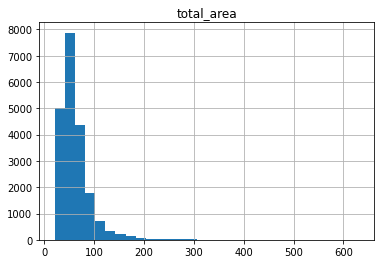

In [104]:
df.hist('total_area', bins=30)

In [105]:
df['total_area'].describe()

count    20707.000000
mean        62.497585
std         35.864329
min         20.600000
25%         41.000000
50%         54.100000
75%         72.000000
max        631.200000
Name: total_area, dtype: float64

При работе с аномальными значениями мы не ограничили выборку, ибо распределения цены и площади были похожи. 

#### Цена

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

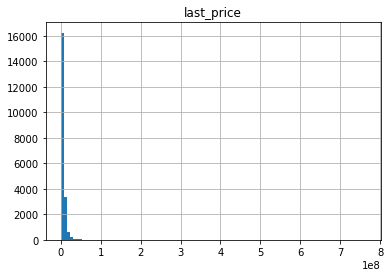

In [106]:
df.hist('last_price', bins = 100)

При работе с аномальными значениями мы не ограничили выборку, ибо распределения цены и площади были похожи. 

#### Число комнат

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

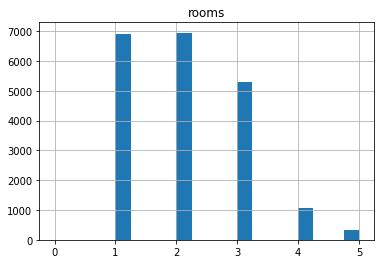

In [107]:
df.hist('rooms', bins=20, range = (0, 5))

In [108]:
df['rooms'].describe()

count    20707.000000
mean         2.115903
std          1.076514
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Ранее здесь возникало значение `0`, которое мы удалили. В целом распределение соотносится с реальностью. 

#### Высота потолков

Оценим распредление высоты потолков всех квартир:

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

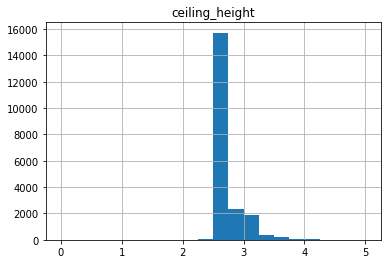

In [109]:
df.hist('ceiling_height', bins=20, range = (0, 5))

In [110]:
df['ceiling_height'].describe()

count    20707.000000
mean         2.708982
std          0.226214
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

При работе с аномальными значениями мы ограничили выборку до следующих минимума и максимума: `4.9` и `1.75`

### Связь между параметрами

#### Связь между основными параметрами

Прежде всего стоит оценить корреляцию Пирсона, чтобы посмотреть как сильно сопряжены параметры между собой:

In [111]:
corr_0 = df.corr()
corr_0.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,weekday,year,month,difference,living_total_share,kitchen_total_share
total_images,1.000000,0.104442,0.108881,0.090336,0.058831,0.004037,0.102736,0.026987,-0.014683,-0.013724,0.105891,0.042821,-0.016225,-0.052274,0.036324,-0.013617,0.009205,-0.014692,-0.038897,0.134980,-0.012140,0.145411,0.007763,0.032849,0.026714,-0.032448
last_price,0.104442,1.000000,0.638904,0.363666,0.362376,-0.025325,0.560720,0.011703,-0.006694,0.007259,0.457275,0.003286,-0.051915,-0.236157,0.211770,-0.031992,0.222569,-0.125680,0.085105,0.764579,0.003909,-0.042744,-0.000434,0.056707,0.019543,-0.120728
total_area,0.108881,0.638904,1.000000,0.772768,0.510910,-0.105561,0.919186,-0.044581,-0.017879,0.003331,0.593670,0.001380,-0.064511,-0.257728,0.219567,-0.035322,0.222405,-0.148829,0.138160,0.309986,-0.001353,-0.076439,0.004889,0.075415,0.144922,-0.386242
rooms,0.090336,0.363666,0.772768,1.000000,0.359777,-0.235878,0.837422,-0.156307,-0.019063,0.007015,0.283223,-0.011809,-0.072402,-0.201139,0.172750,-0.044030,0.141555,-0.100173,0.110655,0.068867,0.001335,-0.051564,-0.002833,0.048765,0.463793,-0.628988
ceiling_height,0.058831,0.362376,0.510910,0.359777,1.000000,-0.131709,0.493016,-0.074278,-0.006537,0.008671,0.390918,-0.057753,-0.113404,-0.323856,0.277508,-0.048624,0.246413,-0.137191,0.113880,0.314688,-0.013769,-0.061156,-0.000575,0.063556,0.051976,-0.105825
floors_total,0.004037,-0.025325,-0.105561,-0.235878,-0.131709,1.000000,-0.183799,0.665925,0.008838,0.004528,0.110244,0.159331,0.047268,-0.001682,-0.162811,0.013106,-0.055050,0.020777,-0.042185,0.132904,0.008933,0.016600,0.012950,-0.128165,-0.332187,0.320781
living_area,0.102736,0.560720,0.919186,0.837422,0.493016,-0.183799,1.000000,-0.105638,-0.014516,0.007674,0.429771,-0.011539,-0.077728,-0.258831,0.235515,-0.046090,0.211600,-0.132143,0.135969,0.249587,-0.003180,-0.075180,0.001572,0.072593,0.450694,-0.518113
floor,0.026987,0.011703,-0.044581,-0.156307,-0.074278,0.665925,-0.105638,1.000000,0.010419,-0.000236,0.097261,0.160714,0.032514,-0.005907,-0.107168,0.011065,-0.033017,0.009062,-0.030436,0.117151,0.009951,0.012703,0.017405,0.550311,-0.238602,0.220452
studio,-0.014683,-0.006694,-0.017879,-0.019063,-0.006537,0.008838,-0.014516,0.010419,1.000000,-0.000362,-0.009619,0.018137,0.007347,0.001465,-0.004586,-0.001631,-0.003608,-0.000252,-0.007654,0.000200,-0.005733,-0.026345,-0.006620,0.007161,0.014406,0.026559
open_plan,-0.013724,0.007259,0.003331,0.007015,0.008671,0.004528,0.007674,-0.000236,-0.000362,1.000000,0.000983,0.002903,-0.006701,-0.003665,0.000761,-0.006722,0.003291,-0.005977,-0.000802,0.008899,-0.004753,-0.032545,-0.005769,-0.008960,0.013202,-0.003957


Рассмотрим каждый коэффициент корреляции:

`Корреляция last_price с total_area = 0.689`:

характер связи положительный - с увеличением last_price, растет и total_area

`Корреляция last_price с cityCenters_nearest = -0.233`:

характер связи отрицательный - с увеличением last_price, cityCenters_nearest уменьшается

`Корреляция last_price с rooms = 0.387`:

характер связи положительный - с увеличением last_price, растет и rooms

`Корреляция last_price с weekday = -0.005`:

почти нет связи между переменными (очень слабая отрицательная)

`Корреляция last_price с year = -0.044`:

почти нет связи между переменными (слабая отрицательная)

`Корреляция last_price с month = -0.001`:

почти нет связи между переменными (слабая отрицательная)


`Корреляция one_metr_price с столбцами:`

положительная связь наблюдается исключительно с колонками: 
`kitchen_area`, `living_area`, `ceiling_height`, `total_area`

Данные выводы в целом видны на самом графике по цвету ячеек.

#### Связь между категоризацией этажей и другими параметрами

Используя категоризацию этажей, было сложно определить характер связи параметров, поэтому построим столбчатую диаграмму и удостверимся в наличие связи или ее отсутствие  

Обратимся к следующему графику: 

<BarContainer object of 20707 artists>

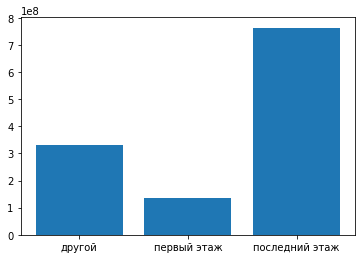

In [112]:
plt.bar(df['floor_category'], df['last_price'])

<BarContainer object of 20707 artists>

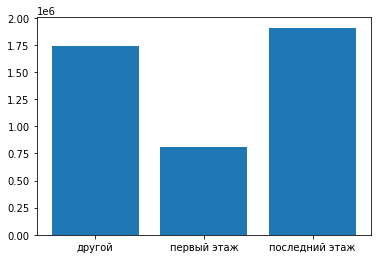

In [113]:
plt.bar(df['floor_category'], df['one_metr_price'])

На первый взгляд кажется, что чем больше этаж, тем выше общая стоимость квартиры. Однако, график относительно категоризации с ценой за метр показывает немного другой результат: цены за этаж, не относящиеся к первому или последнему, дороже. 

Обратимся к более сложным методам графического анализа, чтобы разобраться в наличие/отсутствие связи:

In [114]:
#создадим отдельный даатфрейм с нужными столбцами, чтобы было легче работать
df_new = {
    "floor_category" : df['floor_category'],
    "one_metr_price" : df['one_metr_price'],
    "last_price" : df['last_price'],
    "month" : df['month'],
    "year" : df['year'],
}
df_new = pd.DataFrame(df_new)

In [115]:
#посмотри как выглядит новый даатфрейм
display(df_new.sort_values(by = 'year',ascending=True).head())

,floor_category,one_metr_price,last_price,month,year
6167,другой,64575,3500000,12,2014
16223,другой,51120,6390000,12,2014
21312,другой,78184,6200000,12,2014
23638,другой,64516,4920000,12,2014
13145,другой,82954,3650000,12,2014


In [116]:
#прологарифмируем каждую колонку, чтобы привести данные к нормальному распределению
for column in df_new.columns:
    if column != 'floor_category':
        df_new[column] = np.log10(df_new[column])

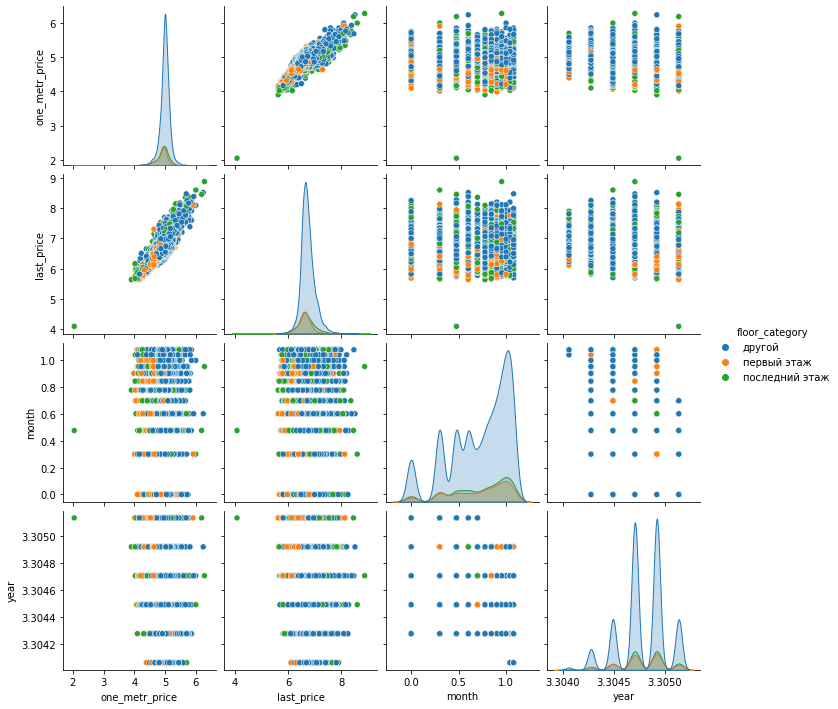

In [117]:
sns.pairplot(df_new, hue = 'floor_category')

Данный график показывает ситуацию в совокупности, в нашем случае было бы полезнее рассмотреть каждую категоризацию в отдельности и исследовать в каком случае связь параметров сильнее. 

Для этого предварительно напишем функцию, которая рассчитывает корреляцию Пирсона и добавим такой параметр к нашим графикам:

In [118]:
def corr(x, y, **kwargs):
    

    coef = np.corrcoef(x, y)[0][1]
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)

Начнем с категории `первый этаж`:

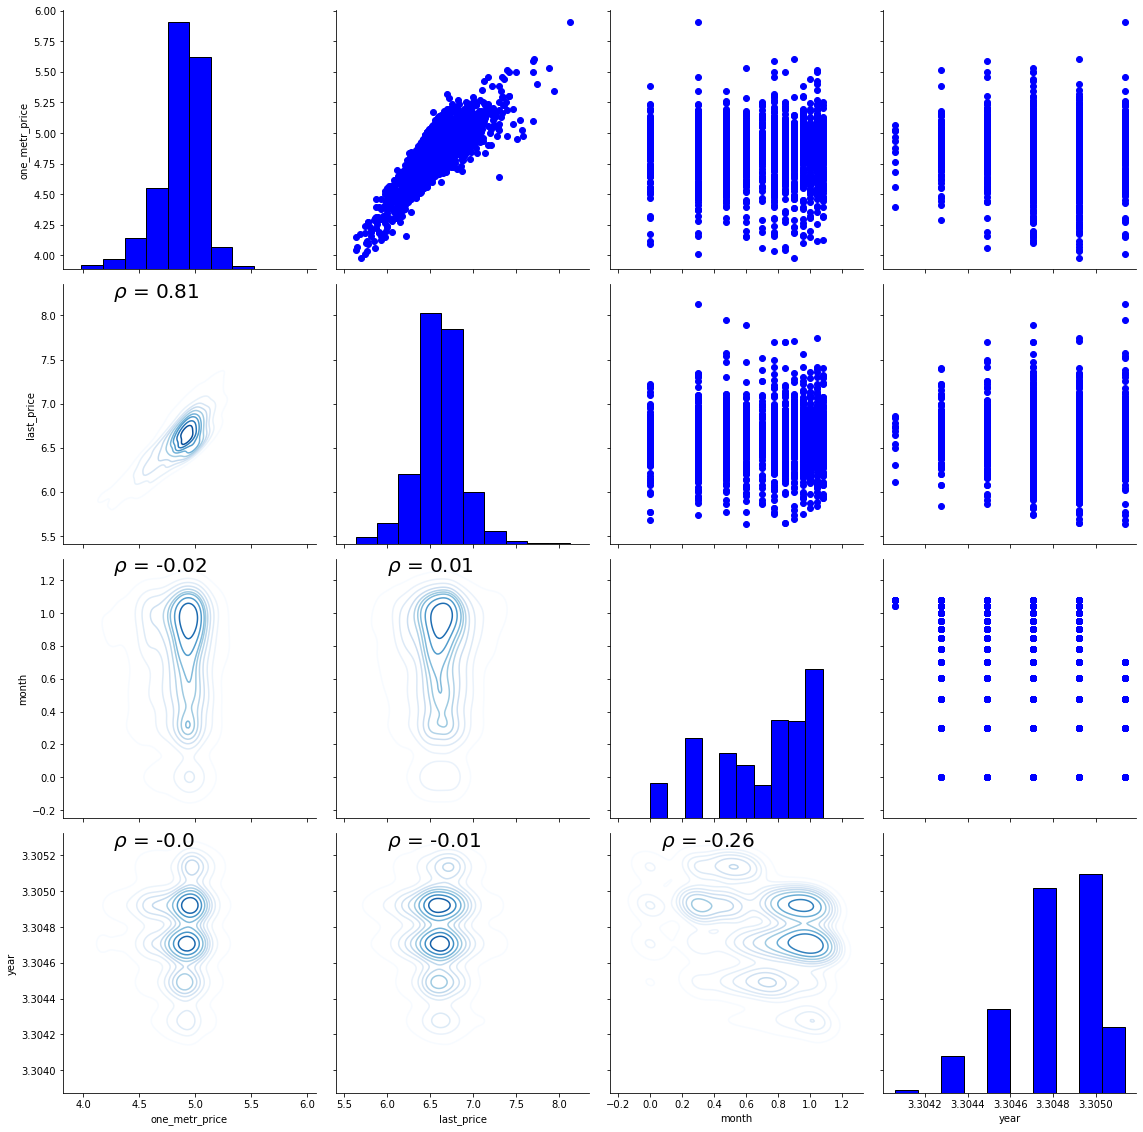

In [119]:
grid = sns.PairGrid(data= df_new[df_new['floor_category'] == 'первый этаж'],
                    vars = ['one_metr_price', 'last_price', 
                    'month', 'year'], height = 4)
grid = grid.map_lower(corr)
grid = grid.map_upper(plt.scatter, color = 'blue')

grid = grid.map_diag(plt.hist, bins = 10, color = 'blue', 
                     edgecolor = 'k')
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')

Категория `другой`:

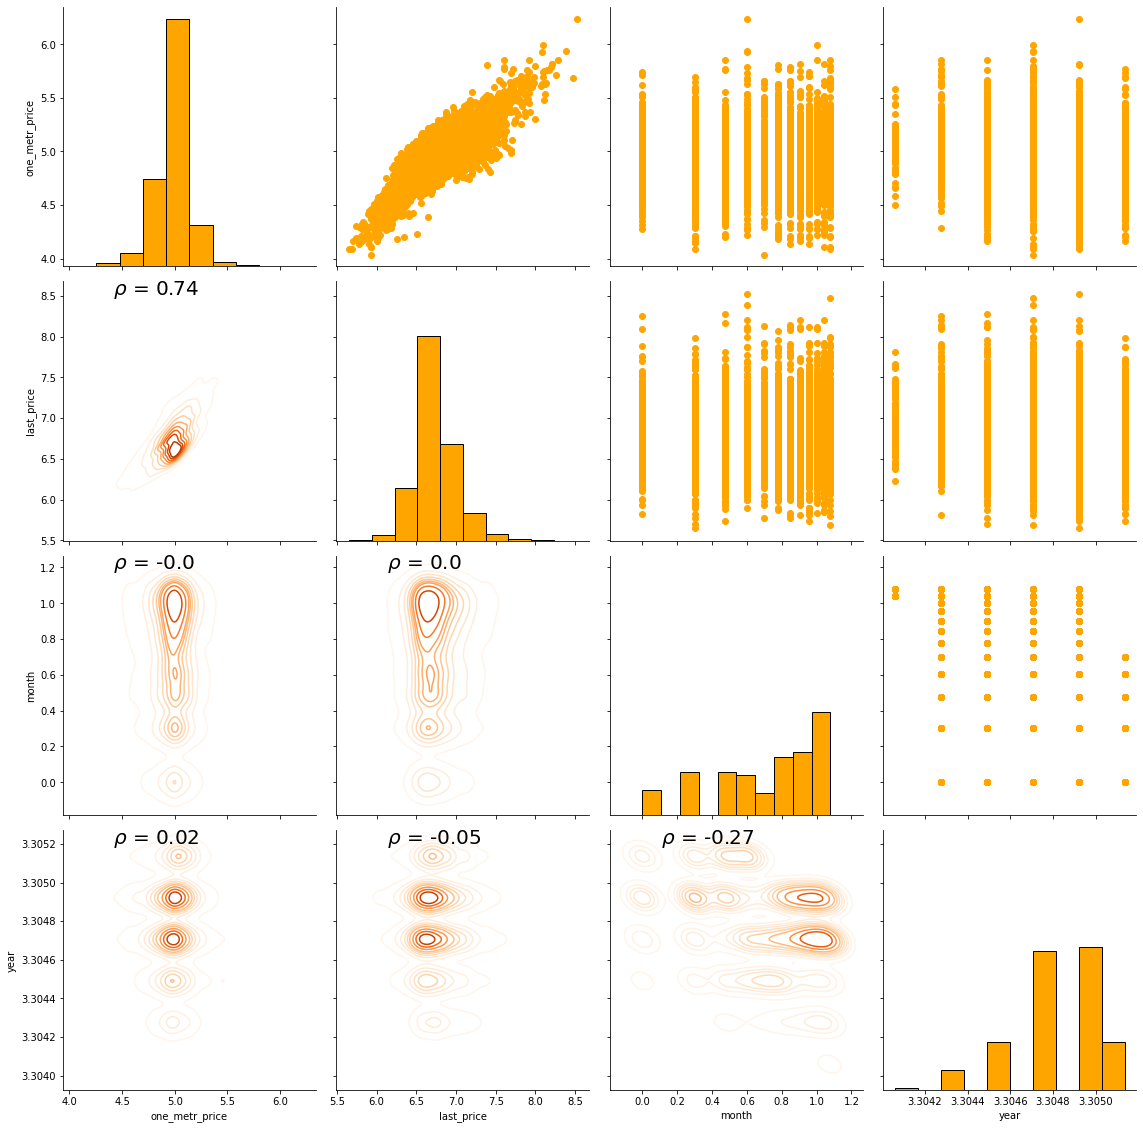

In [120]:
grid_1 = sns.PairGrid(data= df_new[df_new['floor_category'] == 'другой'],
                    vars = ['one_metr_price', 'last_price', 
                    'month', 'year'], height = 4)
grid_1 = grid_1.map_lower(corr)
grid_1 = grid_1.map_upper(plt.scatter, color = 'orange')

grid_1 = grid_1.map_diag(plt.hist, bins = 10, color = 'orange', 
                     edgecolor = 'k')
grid_1 = grid_1.map_lower(sns.kdeplot, cmap = 'Oranges')

Категория `последний этаж`:

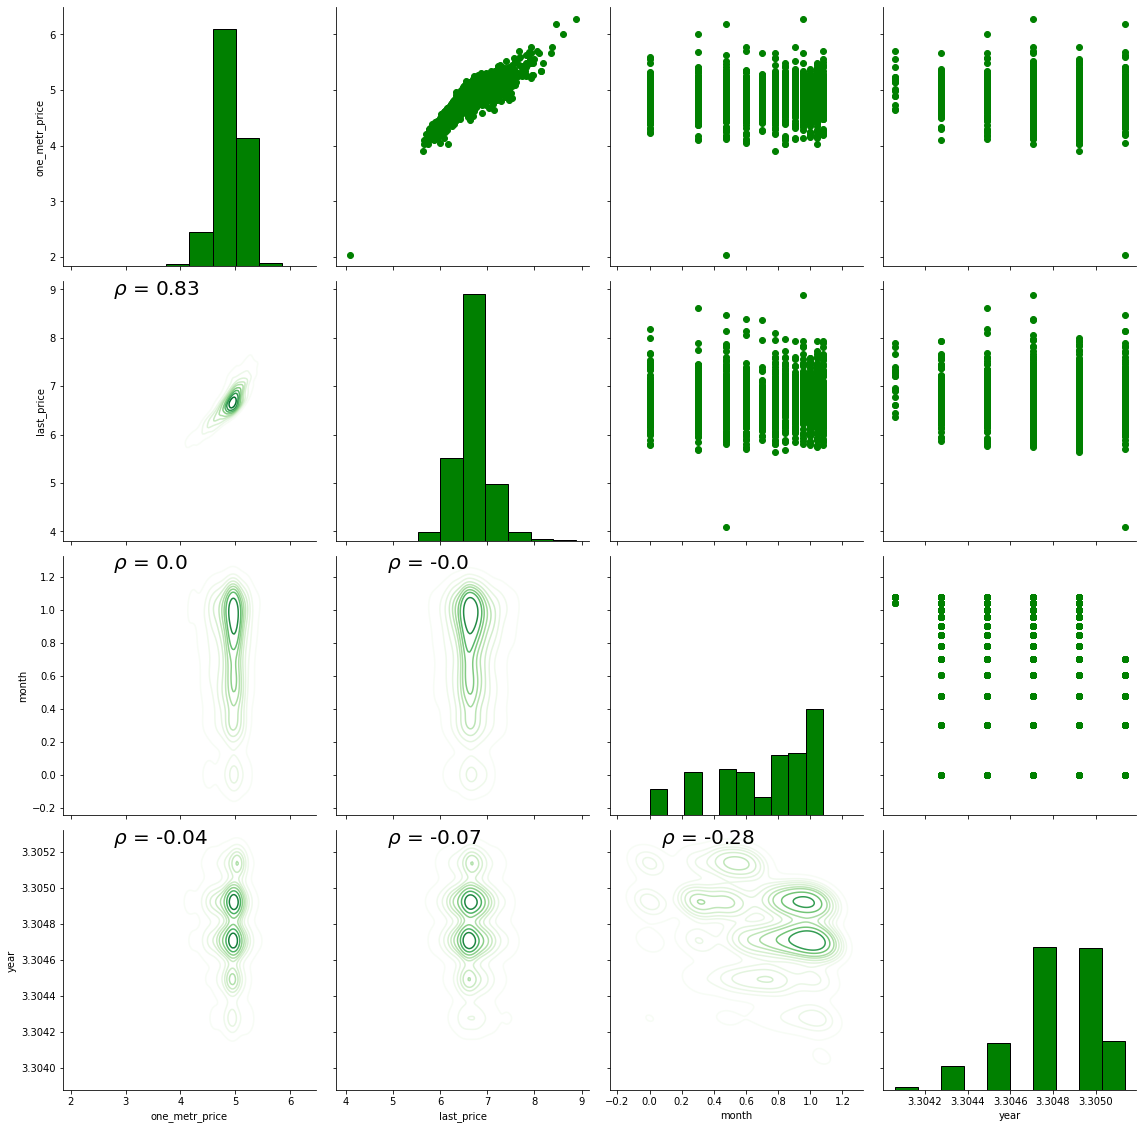

In [121]:
grid_2 = sns.PairGrid(data= df_new[df_new['floor_category'] == 'последний этаж'],
                    vars = ['one_metr_price', 'last_price', 
                    'month', 'year'], height = 4)
grid_2 = grid_2.map_lower(corr)
grid_2 = grid_2.map_upper(plt.scatter, color = 'green')

grid_2 = grid_2.map_diag(plt.hist, bins = 10, color = 'green', 
                     edgecolor = 'k')
grid_2 = grid_2.map_lower(sns.kdeplot, cmap = 'Greens')

Выводы по графикам:
    
   - Связь  `month` и `last_price`, `one_metr_price`: 
   
   Увеличение общей стоимость квартиры для категории `первый этаж` может быть связано со сменой одного месяца на другой (чем выше номер месяца, тем выше стоимость), остальные категории не имеют связь с этим вообще. Аналогично с ценой за один кв. метр. 
   
   
   - Связь  `year` и `last_price`, `one_metr_price`:
   
   Общая стоимость квартиры для категории `последний этаж` отрицательно коррелирует с годом сильнее, чем ост. категории. Что означает меньшу стоимость квартиры с увеличением года, если квартира находится на последнем этаже. Аналогично с ценой за один кв. метр. 
   
   
   - Связь `last_price` и `one_metr_price`:
   
   Для квартир, не относящимся к категориям `первый этаж` и `последний этаж`, зависимость общей стоимости и цены за метр сильнее, чем для других квартир. Иначе говоря, цены для них в среднем выше.

#### Связь между временем продажи квартир и другими параметрами

Начнем с анализа зависимости года и временем продажи квартиры:

In [122]:
df['days_exposition'].corr(df['year'])

-0.5723110120998852

<AxesSubplot:xlabel='year'>

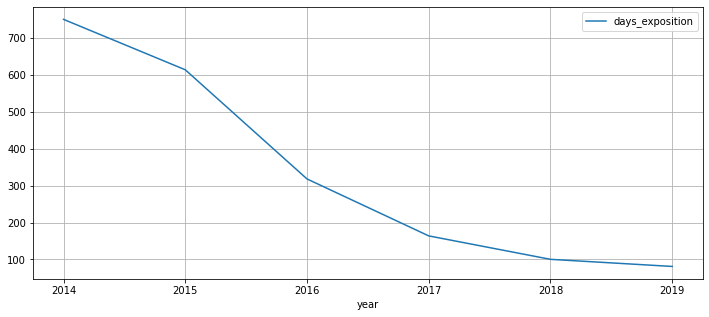

In [123]:
(
    df.pivot_table(index='year', values='days_exposition', aggfunc='mean')
    .plot(grid=True, figsize=(12,5))
)


Видим очень сильную зависимость между годом публикации и временем продажи: чем больше год, тем быстрее продавалась квартира.

Перейдем к месяцу и дню недели:

In [124]:
df['days_exposition'].corr(df['month'])

-0.006807500402539763

In [125]:
df['days_exposition'].corr(df['weekday'])

-0.017196024562196852

Они в одинаковой степени отрицательно зависимы от времени продажи квартиры. По сути со сменой дня недели или меясца продажа происходит быстрее. 

Посмотрим в каких месяцах и днях недели наиболее быстрые продажи:

<AxesSubplot:xlabel='month'>

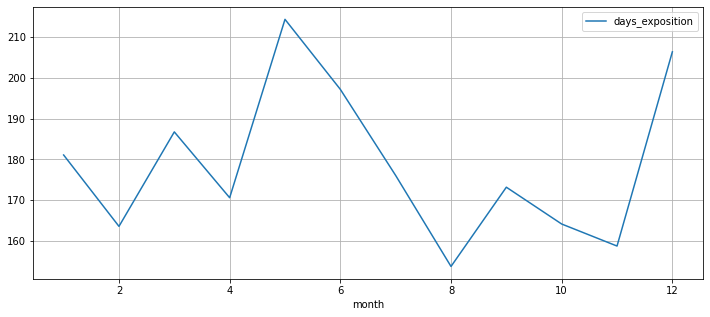

In [126]:
(
    df.pivot_table(index='month', values='days_exposition', aggfunc='mean')
    .plot(grid=True, figsize=(12,5))
)


<AxesSubplot:xlabel='weekday'>

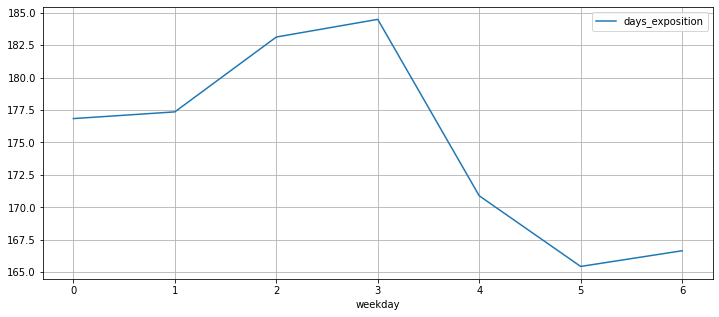

In [127]:
(
    df.pivot_table(index='weekday', values='days_exposition', aggfunc='mean')
    .plot(grid=True, figsize=(12,5))
)


Получается, что в среднем в агусте и по субботам наиболее быстрые продажи. 

Необходимо также оценить характер связи стоимости и времени:

In [128]:
df[['days_exposition', 'one_metr_price', 'last_price']].corr()

,days_exposition,one_metr_price,last_price
days_exposition,1.000000,0.055098,0.085105
one_metr_price,0.055098,1.000000,0.764579
last_price,0.085105,0.764579,1.000000


Связь времени с ценой также имеется: в среднем чем выше цена за метр или общая стоимость, тем медленее будет продаваться квартира. 

### Анализ населенных пунктов 

Определим топ-10 населенных пунктов по количеству объявлений:

In [129]:
df_locality_group_1 = df.pivot_table(index='locality_name', values=['days_exposition'], 
                                   aggfunc=['count'])
df_locality_group_1.columns = ['count_ad']
display(df_locality_group_1.sort_values(by = 'count_ad', ascending=False).head(10))

,count_ad
locality_name,
Санкт-Петербург,14086
Мурино,509
Кудрово,413
Шушары,406
Всеволожск,360
Парголово,301
Колпино,298
Пушкин,279
Гатчина,214


Создадим аналогичную таблицу, которая будет высчитывать среднюю цену за квадратный метр, и скопируем эти данные в предыдущую таблицу:

In [130]:
df_locality_group_2 = df.pivot_table(index='locality_name', values=['one_metr_price'], 
                                   aggfunc=['median'])
df_locality_group_2.columns = ['median_one_mert_price']

df_locality_group_1['median_metr_one'] = df_locality_group_2['median_one_mert_price']

Объединим данные таблицы:

In [131]:
df_top_10_locality = df_locality_group_1.sort_values(by = 'count_ad', ascending=False).head(10)
display(df_top_10_locality.sort_values(by = 'median_metr_one', ascending=False))

,count_ad,median_metr_one
locality_name,,
Санкт-Петербург,14086,105000.0
Пушкин,279,100486.0
Кудрово,413,95000.0
Парголово,301,91346.0
Мурино,509,83661.0
Шушары,406,76747.5
Колпино,298,75000.0
Гатчина,214,69506.0
Всеволожск,360,66072.5


Можно заметить, что самыми "дорогими" и "дешевыми" регионами по стоимости квартир являются: Санкт-Петербург и Всеволожск

<BarContainer object of 10 artists>

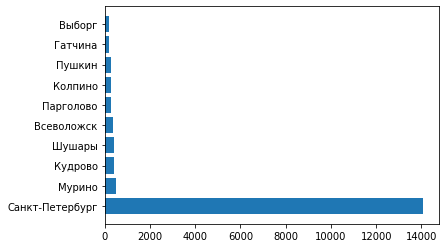

In [132]:
plt.barh(df_top_10_locality.index, df_top_10_locality['count_ad'])

### Изучение предложения квартир Санкт-Петербурга

#### Выделение центра

Выделим квартиры СПБ и построим график, показывающий зависимость цены от удаленности от центра. Для этого переведем колонку `cityCenters_nearest`в километры:

<AxesSubplot:xlabel='city_center_km'>

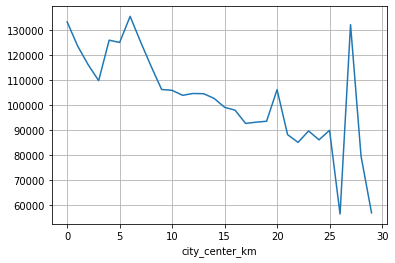

In [133]:
df['city_center_km'] = (df['cityCenters_nearest'] / 1000).astype(int)
df_spb = df.query('locality_name == "Санкт-Петербург"').groupby('city_center_km')['one_metr_price'].median()
df_spb.plot(x='one_metr_price', y='city_center_km', grid=True)

Граница, где график сильно меняется - 5й километр. Он и является началом центральной зоны. 

То есть центр - расстояние до 5км.

Рассмотрим параметры относительно "центральности" квартир. Создадим таблицу, где находятся квартиры внутри центра:

In [134]:
df_spb_center = df.query('(locality_name == "Санкт-Петербург") & (city_center_km <= 6)')

#### Анализ квартир центра

##### Анализ разброса параметров

Теперь перейдем к анализу параметров (сделаем две большие таблицы и оценим их разницу):

In [135]:
multi_centre = pd.DataFrame({
    'Показатель':['count', 'mean', 'std', 'minim', '25%', '50%', '75%', 'maxim'],
    'area': list(df_spb_center['total_area'].describe()),
    'price' : list(df_spb_center['last_price'].describe()),
    'rooms' : list(df_spb_center['rooms'].describe()),
    'ceiling_height' : list(df_spb_center['ceiling_height'].describe()),
    'floor' : list(df_spb_center['floor'].describe()),
    'centre' : list(df_spb_center['city_center_km'].describe()),
})
multi_centre = multi_centre.drop(0, axis=0)
display(multi_centre)

,Показатель,area,price,rooms,ceiling_height,floor,centre
1,mean,96.771787,1.528984e+07,2.934319,2.983269,4.127750,3.835140
2,std,59.682623,2.519905e+07,1.448737,0.351646,2.858886,1.538729
3,minim,24.000000,1.800000e+06,1.000000,2.400000,1.000000,0.000000
4,25%,60.000000,6.900000e+06,2.000000,2.700000,2.000000,3.000000
5,50%,82.100000,9.500000e+06,3.000000,2.970000,4.000000,4.000000
6,75%,113.500000,1.495000e+07,4.000000,3.200000,5.000000,5.000000
7,maxim,631.200000,7.630000e+08,19.000000,4.900000,25.000000,6.000000


In [136]:
multi_spb = pd.DataFrame({
    'Показатель':['count', 'mean', 'std', 'minim', '25%', '50%', '75%', 'maxim'],
    'area': list(df['total_area'].describe()),
    'price' : list(df['last_price'].describe()),
    'rooms' : list(df['rooms'].describe()),
    'ceiling_height' : list(df['ceiling_height'].describe()),
    'floor' : list(df['floor'].describe()),
    'centre' : list(df['city_center_km'].describe()),
})
multi_spb = multi_spb.drop(0, axis=0)
display(multi_spb)

,Показатель,area,price,rooms,ceiling_height,floor,centre
1,mean,62.497585,6.816549e+06,2.115903,2.708982,6.059304,13.886705
2,std,35.864329,1.097588e+07,1.076514,0.226214,4.938202,7.506918
3,minim,20.600000,1.219000e+04,1.000000,1.000000,1.000000,0.000000
4,25%,41.000000,3.600000e+06,1.000000,2.600000,2.000000,10.000000
5,50%,54.100000,4.850000e+06,2.000000,2.700000,5.000000,14.000000
6,75%,72.000000,7.000000e+06,3.000000,2.700000,8.000000,16.000000
7,maxim,631.200000,7.630000e+08,19.000000,4.900000,33.000000,65.000000


Теперь напишем код, который найдет разницу между показателями и наполнит ею новый датафрейм:

In [137]:
area = []
price = []
rooms = []
ceiling_height = []
floor = []
centre = []
for lists in [['area'], ['price'], ['rooms'], ['ceiling_height'], ['floor'],['centre']]:
    for column in ['area', 'price', 'rooms', 'ceiling_height', 'floor',
       'centre']:
        if lists[0] == column:
            i = 1
            while i <= 7:
                lists.append(multi_centre.loc[i, column] - multi_spb.loc[i, column])
                i += 1
            if 'area' in lists:
                area.append(lists)
                del area[0][0]
            elif 'price' in lists:
                price.append(lists)
                del price[0][0]
            elif 'rooms' in lists:
                rooms.append(lists)
                del rooms[0][0]
            elif 'ceiling_height' in lists:
                ceiling_height.append(lists)
                del ceiling_height[0][0]
            elif 'floor' in lists:
                floor.append(lists)
                del floor[0][0]
            elif 'centre' in lists:
                centre.append(lists)
                del centre[0][0]

In [138]:
spb_vs_center = pd.DataFrame({
    'Показатель':['mean', 'std', 'minim', '25%', '50%', '75%', 'maxim'],
    'area': area[0],
    'price' : price[0],
    'rooms' : rooms[0],
    'ceiling_height' : ceiling_height[0],
    'floor' : floor[0],
    'centre' : centre[0],
})
display(spb_vs_center)

,Показатель,area,price,rooms,ceiling_height,floor,centre
0,mean,34.274202,8.473287e+06,0.818416,0.274287,-1.931553,-10.051565
1,std,23.818295,1.422317e+07,0.372222,0.125431,-2.079316,-5.968189
2,minim,3.400000,1.787810e+06,0.000000,1.400000,0.000000,0.000000
3,25%,19.000000,3.300000e+06,1.000000,0.100000,0.000000,-7.000000
4,50%,28.000000,4.650000e+06,1.000000,0.270000,-1.000000,-10.000000
5,75%,41.500000,7.950000e+06,1.000000,0.500000,-3.000000,-11.000000
6,maxim,0.000000,0.000000e+00,0.000000,0.000000,-8.000000,-59.000000


Теперь видны отличия между центром и всем городом (+нас. пункты). Пройдемся по каждому парметру:

`area`:
данные отличаются, но не очень сильно (все значения близки друг к другу)

`price`:
здесь же разница ощутима, ибо она составляет не несколько десятых или сотых, а миллионы. 

`rooms`:
в данном случае даже квартильные размахи не отличаются

`ceiling_height	`:
данные практически не отличаются 

`floor`:
данные практически отличаются 

`centre`:
данные отличаются, но не очень сильно (все значения близки друг к другу)

##### Анализ связи параметров внутри центра

In [139]:
corr_1 = df_spb_center.corr()
corr_1.style.background_gradient(cmap='coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_metr_price,weekday,year,month,difference,living_total_share,kitchen_total_share,city_center_km
total_images,1.000000,0.133735,0.092160,0.042575,0.094251,-0.060050,0.079481,-0.008769,-0.018779,-0.013676,0.136025,0.028806,0.014678,-0.022482,0.050248,-0.048338,-0.026294,-0.005773,-0.054159,0.160199,0.007142,0.148001,-0.003819,0.066907,-0.001996,0.036795,-0.024452
last_price,0.133735,1.000000,0.608432,0.302327,0.213887,0.044851,0.509521,0.118772,-0.007762,-0.006655,0.412079,0.080326,0.091452,-0.045972,0.098165,-0.066937,0.096909,-0.093765,0.058950,0.815285,0.026134,-0.034247,-0.009635,0.104398,-0.045551,-0.118726,-0.050028
total_area,0.092160,0.608432,1.000000,0.730075,0.377666,-0.020140,0.898773,0.107834,-0.019066,-0.006840,0.530438,0.031189,0.029587,-0.079527,0.095117,-0.101212,0.007635,-0.099128,0.114235,0.257159,0.004223,-0.057922,-0.014056,0.161292,0.069667,-0.380682,-0.089081
rooms,0.042575,0.302327,0.730075,1.000000,0.322861,-0.189204,0.798614,-0.041757,-0.024204,0.010012,0.253084,-0.067248,-0.068500,-0.159870,0.094935,-0.104929,-0.032437,-0.069536,0.092632,-0.004606,-0.009238,-0.037884,-0.024215,0.133085,0.378724,-0.528906,-0.167259
ceiling_height,0.094251,0.213887,0.377666,0.322861,1.000000,-0.256799,0.401774,-0.130709,-0.009448,0.013980,0.203846,-0.076832,-0.038406,-0.192443,0.139415,-0.115217,0.010979,-0.078513,0.064047,0.107537,-0.031135,0.028982,-0.015816,0.083792,0.142047,-0.186242,-0.192978
floors_total,-0.060050,0.044851,-0.020140,-0.189204,-0.256799,1.000000,-0.118582,0.652070,0.015255,-0.013479,0.092923,0.358411,0.148514,0.349195,-0.249565,0.128845,-0.041786,0.047659,0.024431,0.131485,0.023774,-0.035774,0.024485,-0.126523,-0.316870,0.174479,0.341222
living_area,0.079481,0.509521,0.898773,0.798614,0.401774,-0.118582,1.000000,0.028087,-0.017484,0.002417,0.374361,-0.005915,-0.011765,-0.128608,0.126443,-0.108370,0.005459,-0.086596,0.112497,0.182662,-0.009000,-0.068662,-0.001146,0.161404,0.411418,-0.497374,-0.138908
floor,-0.008769,0.118772,0.107834,-0.041757,-0.130709,0.652070,0.028087,1.000000,0.037235,-0.019084,0.118629,0.276321,0.078224,0.210966,-0.162415,0.065058,-0.047197,0.013006,0.028434,0.138890,0.036469,-0.026124,0.026876,0.574840,-0.188817,0.046205,0.207019
studio,-0.018779,-0.007762,-0.019066,-0.024204,-0.009448,0.015255,-0.017484,0.037235,1.000000,-0.000465,-0.014019,0.040730,-0.004215,0.011406,-0.019892,-0.000151,-0.004790,-0.002620,-0.012826,-0.002160,-0.026362,-0.018419,-0.012572,0.025560,0.006584,0.016024,0.013723
open_plan,-0.013676,-0.006655,-0.006840,0.010012,0.013980,-0.013479,0.002417,-0.019084,-0.000465,1.000000,-0.007663,-0.010528,-0.014832,-0.010125,-0.001254,-0.013227,-0.006775,-0.014203,-0.008290,-0.010826,0.000002,-0.037383,0.008076,-0.020124,0.036351,-0.006183,-0.013917


Все параметры, связанные с площадью, очень сильно коррелируют с общей стоимостью квартиры, однако каждый коэф. корреляции из них меньше по сравнению со всем датасетом. 

Кроме того, необоходимо упоминуть еще параметры, чья корреляция, кроме площадей, изменилась из-за  центральность квартир: 

`floor`:

In [140]:
df['floor'].corr(df['last_price'])

0.011703145856207147

In [141]:
df_spb_center['floor'].corr(df_spb_center['last_price'])

0.11877175429772908

Общая стоимость стала более подвержена этажу, на котором находится квартира: чем выше этаж, тем больше стоимость. 

`open_plan`:

In [142]:
df['open_plan'].corr(df['last_price'])

0.007258928454892825

In [143]:
df_spb_center['open_plan'].corr(df_spb_center['last_price'])

-0.006654539340206572

Получается, что наличие свободной планировки почти не имеет значение для квартир центра по сравнению со всем датасетом. 

`one_metr_price`:

In [144]:
df['one_metr_price'].corr(df['last_price'])

0.7645787738302419

In [145]:
df_spb_center['one_metr_price'].corr(df_spb_center['last_price'])

0.8152849434004769

Связь цены за кв. метр и общей стоимости в центре сильнее. Это может означать, что цена за кв. метр в центре дороже, чем в ост. местностях.

`rooms`:

In [146]:
df['rooms'].corr(df['last_price'])

0.36366629391990457

In [147]:
df_spb_center['rooms'].corr(df_spb_center['last_price'])

0.3023265710638827

Выходит, что в центре количество комнат менее значимы, чем в ост. местностях. 

Теперь рассмотрим время продажи квартир и сравним с центром:

In [148]:
df_spb_center[['days_exposition', 'one_metr_price', 'last_price', 'year', 'month', 'weekday']].corr()

,days_exposition,one_metr_price,last_price,year,month,weekday
days_exposition,1.000000,0.035298,0.058950,-0.608159,0.004007,-0.030688
one_metr_price,0.035298,1.000000,0.815285,0.005618,-0.007251,0.026784
last_price,0.058950,0.815285,1.000000,-0.034247,-0.009635,0.026134
year,-0.608159,0.005618,-0.034247,1.000000,-0.247987,0.005586
month,0.004007,-0.007251,-0.009635,-0.247987,1.000000,0.031701
weekday,-0.030688,0.026784,0.026134,0.005586,0.031701,1.000000


In [149]:
df[['days_exposition', 'one_metr_price', 'last_price', 'year', 'month', 'weekday']].corr()

,days_exposition,one_metr_price,last_price,year,month,weekday
days_exposition,1.000000,0.055098,0.085105,-0.572311,-0.006808,-0.017196
one_metr_price,0.055098,1.000000,0.764579,0.004107,-0.003577,-0.007590
last_price,0.085105,0.764579,1.000000,-0.042744,-0.000434,0.003909
year,-0.572311,0.004107,-0.042744,1.000000,-0.268745,-0.002775
month,-0.006808,-0.003577,-0.000434,-0.268745,1.000000,0.005362
weekday,-0.017196,-0.007590,0.003909,-0.002775,0.005362,1.000000


В центре цена за кв. метр сильнее связан с временем продажи квартиры, чем во датасете:
если квартира долго не продается, кв. метр растет. Аналогично касается общей стоимости квартиры. 

Чем свежее публикация квартиры, тем быстрее она продатся. В центре "быстрота" продажи еще сильнее связана с годом. Более того, еще и с месяцем, хотя относительно всего датасета такой связи не наблюдалось. 

Определим в каком месяце и дне неделе в среднем можно продать быстро квартиру:

<AxesSubplot:xlabel='month'>

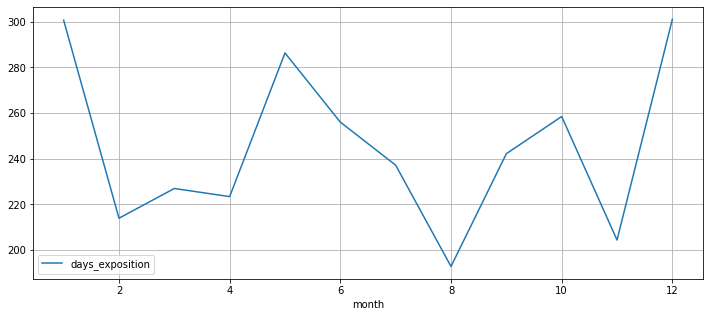

In [150]:
(
    df_spb_center.pivot_table(index='month', values='days_exposition', aggfunc='mean')
    .plot(grid=True, figsize=(12,5))
)


<AxesSubplot:xlabel='weekday'>

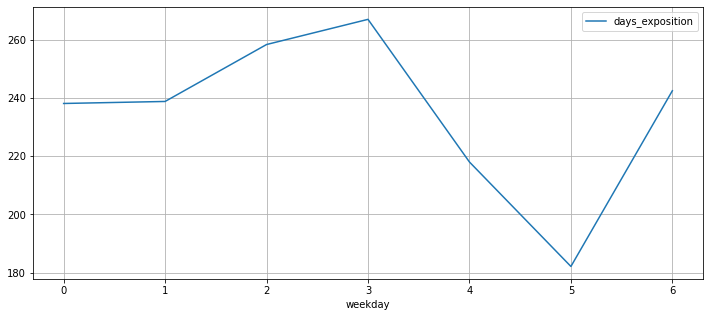

In [151]:
(
    df_spb_center.pivot_table(index='weekday', values='days_exposition', aggfunc='mean')
    .plot(grid=True, figsize=(12,5))
)


Получается, что в среднем в ноябре и по субботам наиболее быстрые продажи.

Перейдем от корреляционного метода к графическому и оценим как зависит категоризация этажей от параметров:

In [152]:
df_new_spb = {
    "floor_category" : df_spb_center['floor_category'],
    "one_metr_price" : df_spb_center['one_metr_price'],
    "last_price" : df_spb_center['last_price'],
    "month" : df_spb_center['month'],
    "year" : df_spb_center['year'],
}
df_new_spb = pd.DataFrame(df_new_spb)

In [153]:
#прологарифмируем каждую колонку, чтобы привести данные к нормальному распределению
for column in df_new_spb.columns:
    if column != 'floor_category':
        df_new_spb[column] = np.log10(df_new_spb[column])

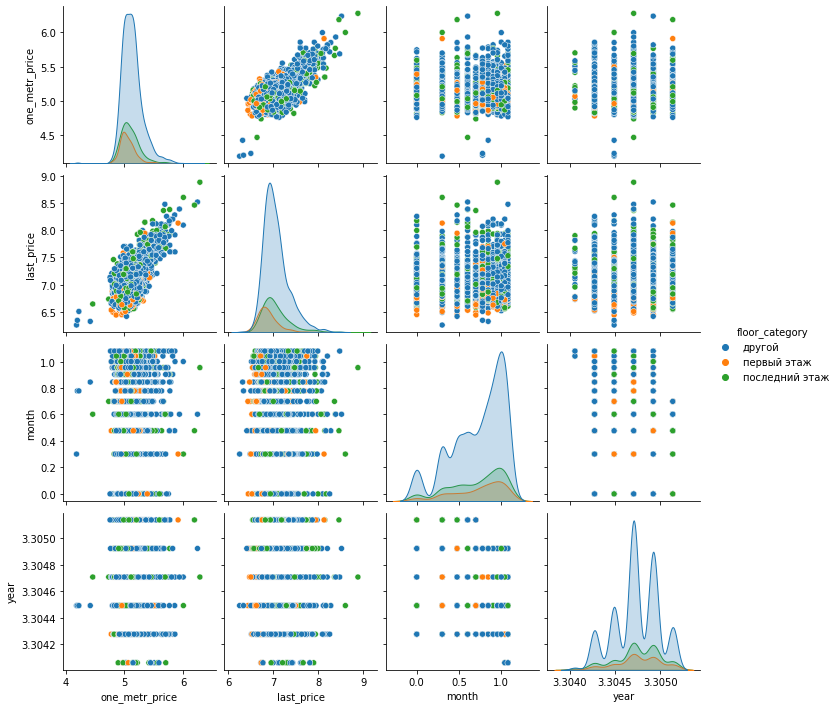

In [154]:
sns.pairplot(df_new_spb, hue = 'floor_category')

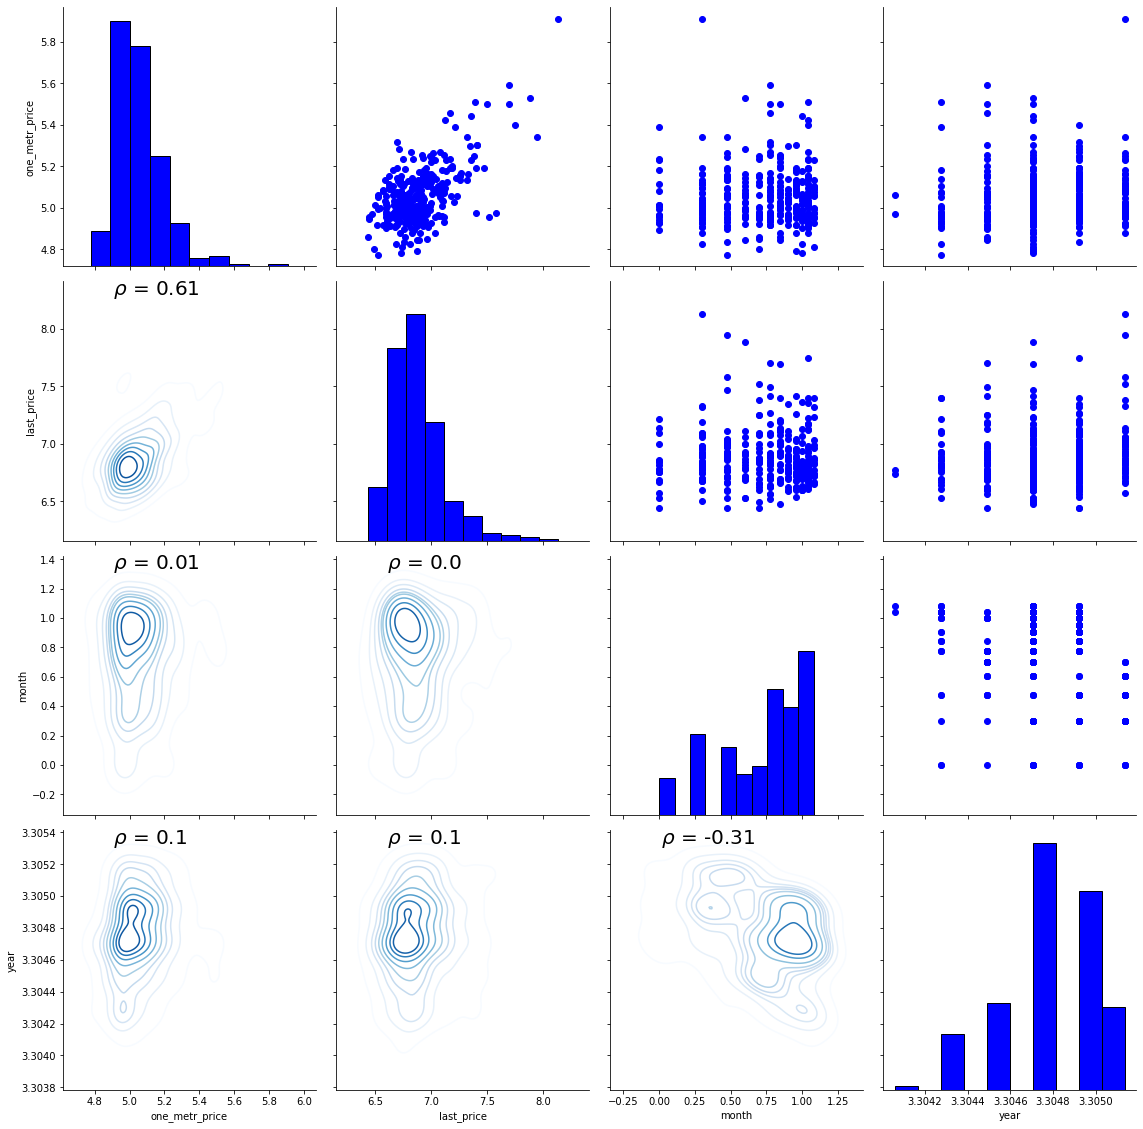

In [155]:
grid_3 = sns.PairGrid(data= df_new_spb[df_new_spb['floor_category'] == 'первый этаж'],
                    vars = ['one_metr_price', 'last_price', 
                    'month', 'year'], height = 4)
grid_3 = grid_3.map_lower(corr)
grid_3 = grid_3.map_upper(plt.scatter, color = 'blue')

grid_3 = grid_3.map_diag(plt.hist, bins = 10, color = 'blue', 
                     edgecolor = 'k')
grid_3 = grid_3.map_lower(sns.kdeplot, cmap = 'Blues')


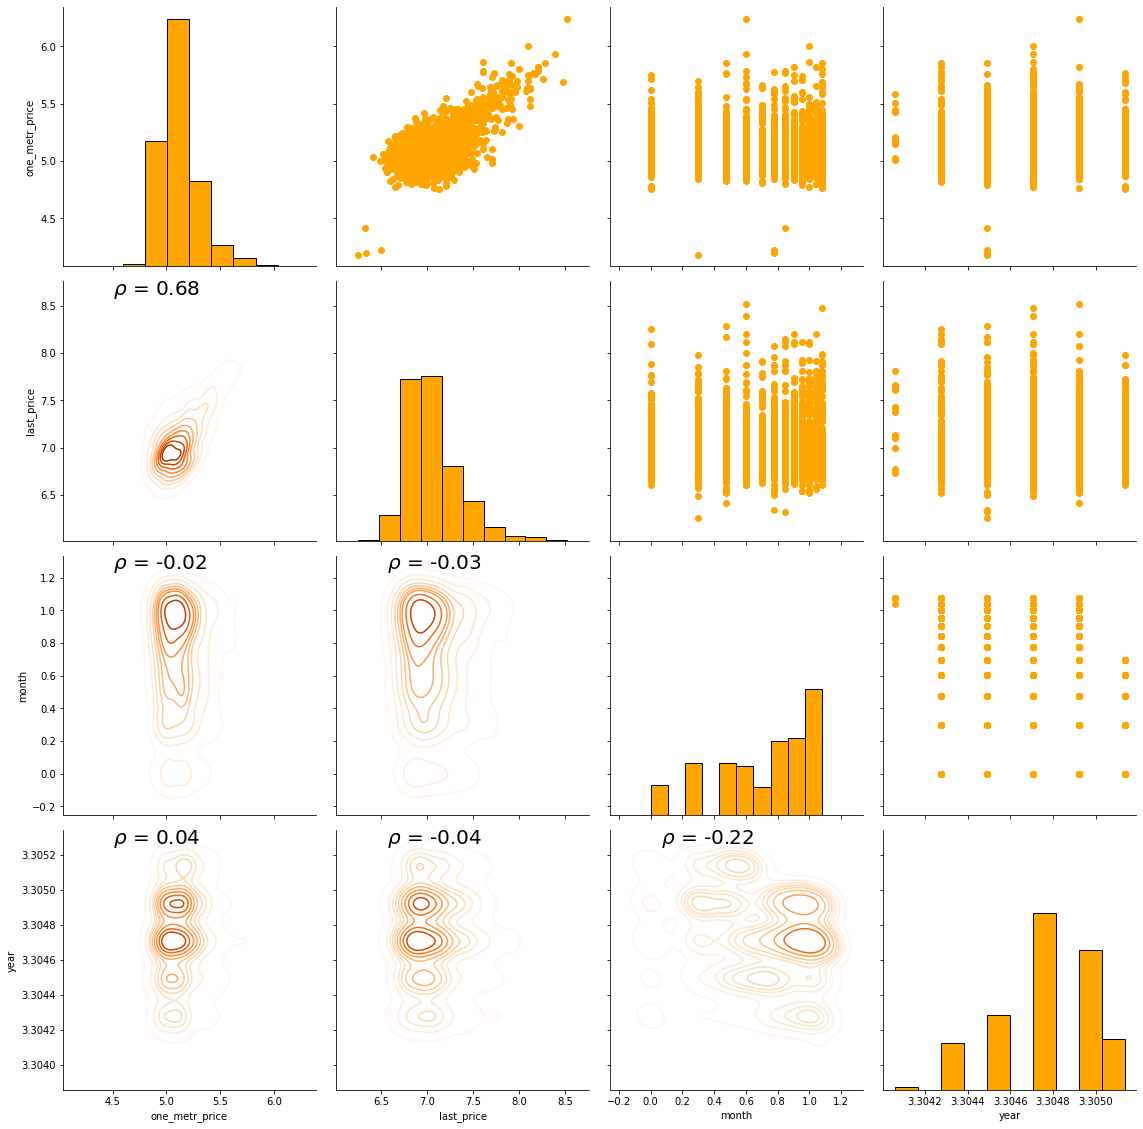

In [156]:
grid_4 = sns.PairGrid(data= df_new_spb[df_new_spb['floor_category'] == 'другой'],
                    vars = ['one_metr_price', 'last_price', 
                    'month', 'year'], height = 4)
grid_4 = grid_4.map_lower(corr)
grid_4 = grid_4.map_upper(plt.scatter, color = 'orange')

grid_4 = grid_4.map_diag(plt.hist, bins = 10, color = 'orange', 
                     edgecolor = 'k')
grid_4 = grid_4.map_lower(sns.kdeplot, cmap = 'Oranges')

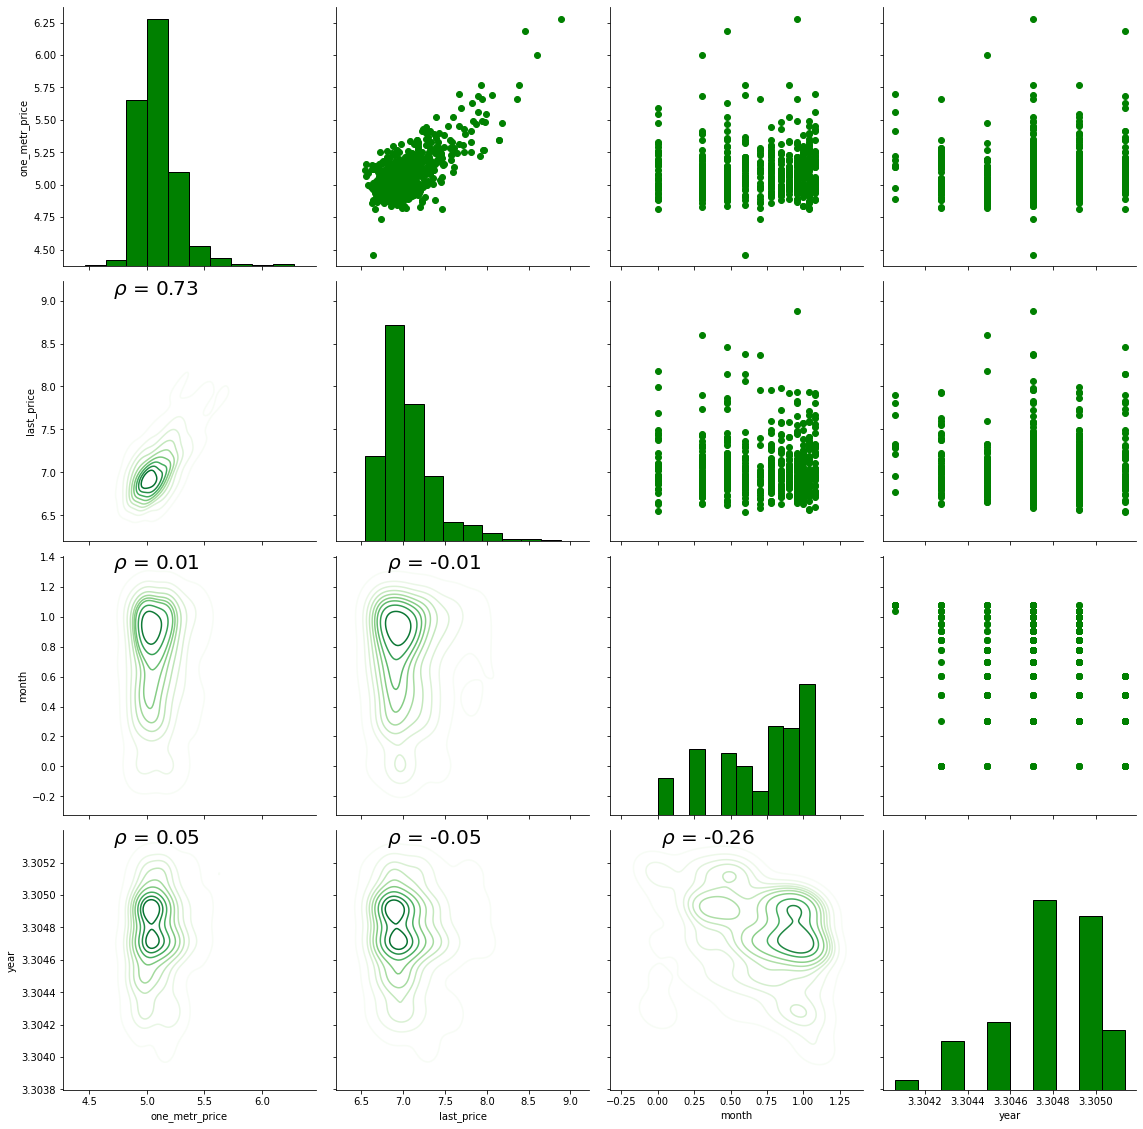

In [157]:
grid_5 = sns.PairGrid(data= df_new_spb[df_new_spb['floor_category'] == 'последний этаж'],
                    vars = ['one_metr_price', 'last_price', 
                    'month', 'year'], height = 4)

grid_5 = grid_5.map_lower(corr)
grid_5 = grid_5.map_upper(plt.scatter, color = 'green')

grid_5 = grid_5.map_diag(plt.hist, bins = 10, color = 'green', 
                     edgecolor = 'k')
grid_5 = grid_5.map_lower(sns.kdeplot, cmap = 'Greens')

Выводы по графикам:
    
   - Связь  `month` и `last_price`, `one_metr_price`: 
   
   Увеличение общей стоимость квартиры для категории `последний этаж` может быть связано со сменой одного месяца на другой (чем выше номер месяца, тем выше стоимость), для категории `другой` такая связь и вовсе слабая отрицательная. Аналогично с ценой за один кв. метр. 
   
   
   - Связь  `year` и `last_price`, `one_metr_price`:
   
   Общая стоимость квартиры для категории `последний этаж` отрицательно коррелирует с годом сильнее, чем ост. категории. Что означает меньшу стоимость квартиры с увеличением года, если квартира находится на последнем этаже. Аналогично с ценой за один кв. метр. 
   
   Однако, для категории `первый этаж` цена за кв. метр имеет наибольшую положительную связь с годом, что говорит нам следующее: квартиры первого этажа приобретают в цене с годами. 
   
   
   - Связь `last_price` и `one_metr_price`:
   
   Для квартир, не относящимся к категориям `другой` и `последний этаж`, зависимость общей стоимости и цены за метр слабее, чем для других квартир. Иначе говоря, цены для них в среднем меньше.

## Общий вывод:

**Обзор данных**:
   - Данные о квартирах получили из файла `real_estate_data.csv`.
   - Предварительно качество данных было несильно высокого уровня из-за наличия аномальных значений, дубликатов и пропусков.
   - Сами данные представляли из себя сводку критериев по купле-продаже квартир.


**Предобработка**:
   - Также заполнили пропуски и обработали аномальные значения.
   - Кроме того, сделали категоризацию данных, чтобы упростить работу с таблицей.


**Анализ**:
   - Цель исследования была выполнена: параметры были установлены.
   - Сделали валидацию результатов по средствам таблиц и стат. данных.
   - Установили разницу в разбросе параметров и связи относительно центра и всего датасета:
       - квартиры в центре дороже (разброс `last_price` очень высокий)
       - общее количество этажей в центре меньше: около 4
       - общая площадь квартир центра отклоняется от медианы сильнее, чем весь датасет
       - категоризация этажей сильнее влияет на цену в центре
       - "быстрые продажи" в среднем происходят по субботам, в центре - в ноябре, во всем датасете - в агусте
       - чем свежее публикация квартиры из центра, тем быстрее она продатся


**Рекомендации по установлении рыночной стоимости квартиры**:
   - Стоит обращать внимание на "центральность" той или иной недвижимости, потому что такие параметры, как цена и площадь подвержены изменениям ввиду территориального нахождения объекта. 
   - Если квартира находится в центре, то ее цена в большей степени зависит не только от площади, но и количеству комнат, этажей и планерки. 
   - Количество комнат тоже играет немаловажную роль, с ростом комнат, растет и цена на квартиру вне зависимости от ее нахождения.